In [379]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os, os.path

### First thing I want to do is confirm whether the diffusion of glosses follows the same pattern in all whitnesses and where there are outliers or anomalies

In [380]:
VLO41_diffusion_Keil = pd.read_csv('/Users/vlachou/Desktop/ENC/MEMOIRE/Eutyches/comparative_mss_analysis/diffusion_csv/diffusion_VLO41_annotations_Keil.csv',encoding='utf-8')
Bamberg_diffusion_Keil = pd.read_csv('/Users/vlachou/Desktop/ENC/MEMOIRE/Eutyches/comparative_mss_analysis/diffusion_csv/diffusion_Bamberg_annotations_Keil.csv',encoding='utf-8')
Lat14087_diffusion_Keil = pd.read_csv('/Users/vlachou/Desktop/ENC/MEMOIRE/Eutyches/comparative_mss_analysis/diffusion_csv/diffusion_Lat14087_annotations_Keil.csv',encoding='utf-8')
Lat7499_diffusion_Keil = pd.read_csv('/Users/vlachou/Desktop/ENC/MEMOIRE/Eutyches/comparative_mss_analysis/diffusion_csv/diffusion_Lat7499_annotations_Keil.csv',encoding='utf-8')

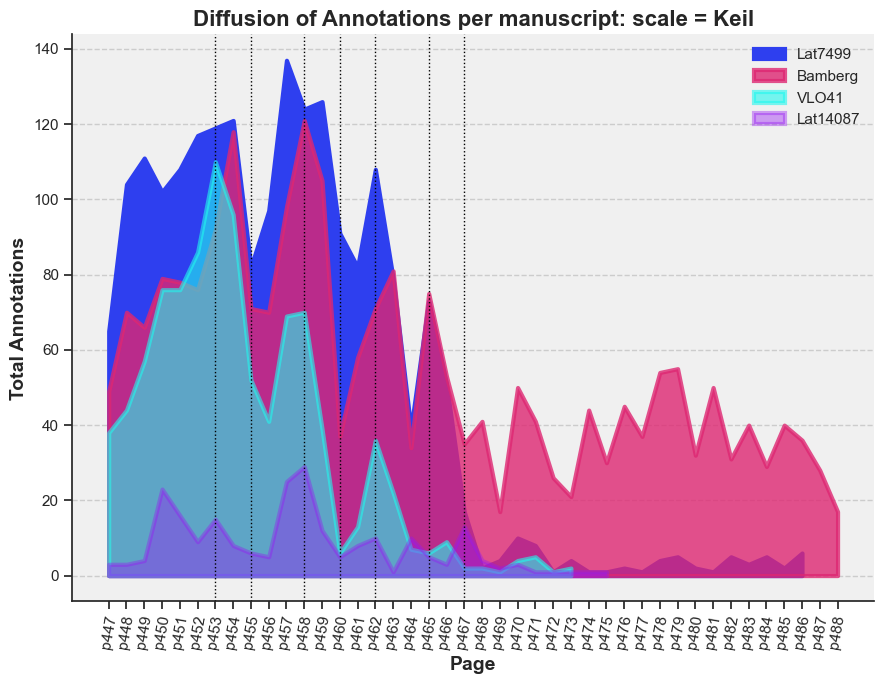

In [468]:
# Define custom color palette
colors = ['#9619F3', '#DE2772', '#21F8EE', '#2E3FEF'] #'#F175AF'

# Concatenate the dataframes horizontally
merged_df = pd.concat([VLO41_diffusion_Keil['gloss'].rename('gloss_id_VLO41'), 
                       VLO41_diffusion_Keil['marginal_note_id'].rename('marginal_note_id_VLO41'),
                       Bamberg_diffusion_Keil['gloss'].rename('gloss_id_Bamberg'), 
                       Bamberg_diffusion_Keil['marginal_note_id'].rename('marginal_note_id_Bamberg'),
                       Lat14087_diffusion_Keil['gloss'].rename('gloss_id_Lat14087'),
                       Lat7499_diffusion_Keil['gloss'].rename('gloss_id_Lat7499'), 
                       Lat7499_diffusion_Keil['marginal_note_id'].rename('marginal_note_id_Lat7499')], axis=1, sort=False)

merged_df['page'] = Bamberg_diffusion_Keil['page']

# Calculate the total annotations per page by summing the values
merged_df['total_annotations_VLO41'] = merged_df['gloss_id_VLO41'] + merged_df['marginal_note_id_VLO41']
merged_df['total_annotations_Bamberg'] = merged_df['gloss_id_Bamberg'] + merged_df['marginal_note_id_Bamberg']
merged_df['total_annotations_Lat14087'] = merged_df['gloss_id_Lat14087']
merged_df['total_annotations_Lat7499'] = merged_df['gloss_id_Lat7499'] + merged_df['marginal_note_id_Lat7499']

merged_df = merged_df[['page', 'total_annotations_Lat14087', 'total_annotations_VLO41', 'total_annotations_Bamberg', 'total_annotations_Lat7499']]

# Set the style using Seaborn
sns.set(style='ticks')

plt.figure(figsize=(9, 7))  # Adjust the width and height as needed


# Create the area chart
plt.fill_between(merged_df['page'], merged_df['total_annotations_Lat7499'], label='Lat7499', color=colors[3], alpha=1.0, linewidth=3)
plt.fill_between(merged_df['page'], merged_df['total_annotations_Bamberg'], label='Bamberg', color=colors[1], alpha=0.8, linewidth=3)
plt.fill_between(merged_df['page'], merged_df['total_annotations_VLO41'], label='VLO41', color=colors[2], alpha=0.6, linewidth=3)
plt.fill_between(merged_df['page'], merged_df['total_annotations_Lat14087'], label='Lat14087', color=colors[0], alpha=0.4, linewidth=3)

# Set x-axis tick labels rotation
plt.xticks(rotation=80)

# Customize font size and style
plt.xlabel('Page', fontsize=14, fontweight='bold')
plt.ylabel('Total Annotations', fontsize=14, fontweight='bold')
plt.title('Diffusion of Annotations per manuscript: scale = Keil', fontsize=16, fontweight='bold')

# Customize legend
plt.legend(frameon=False)

# Set the figure background color
plt.gca().set_facecolor('#F0F0F0')

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show gridlines
plt.grid(axis='y', linestyle='--', alpha=1.0)

# Add vertical lines at specified x-axis markers
x_markers = ['p453','p455', 'p458', 'p460', 'p462','p465', 'p467']
for marker in x_markers:
    plt.axvline(x=marker, color='black', linestyle=':', linewidth=1.0)

# Adjust the layout for better spacing
plt.tight_layout()

plt.savefig('graphs/comparative_diffusion_mss_Keil.png')


plt.show()


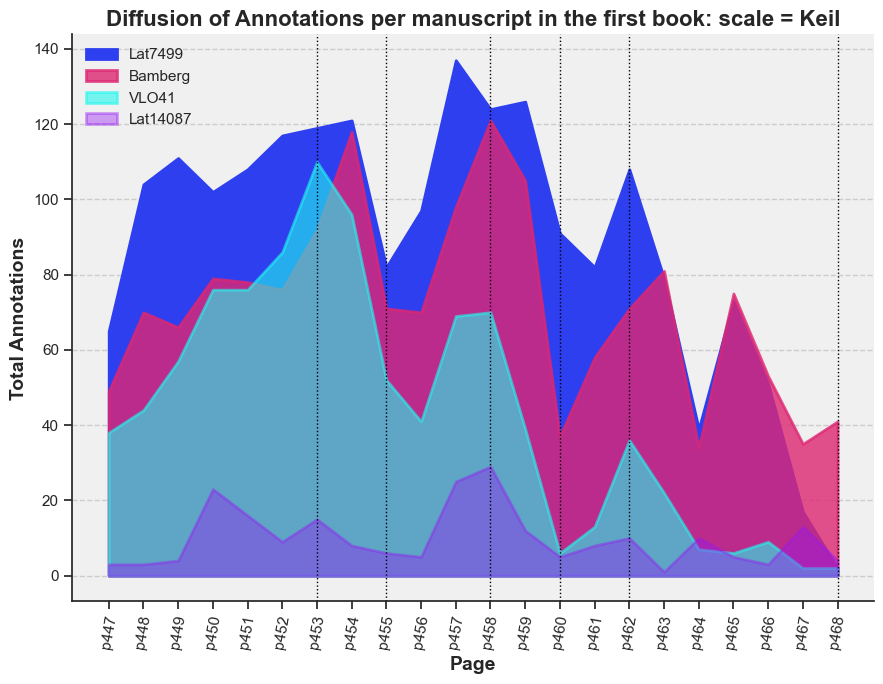

In [382]:

# Define custom color palette
colors = ['#9619F3', '#DE2772', '#21F8EE', '#2E3FEF'] #'#F175AF'

# Concatenate the dataframes horizontally
merged_df = pd.concat([VLO41_diffusion_Keil['gloss'].rename('gloss_id_VLO41'), 
                       VLO41_diffusion_Keil['marginal_note_id'].rename('marginal_note_id_VLO41'),
                       Bamberg_diffusion_Keil['gloss'].rename('gloss_id_Bamberg'), 
                       Bamberg_diffusion_Keil['marginal_note_id'].rename('marginal_note_id_Bamberg'),
                       Lat14087_diffusion_Keil['gloss'].rename('gloss_id_Lat14087'),
                       Lat7499_diffusion_Keil['gloss'].rename('gloss_id_Lat7499'), 
                       Lat7499_diffusion_Keil['marginal_note_id'].rename('marginal_note_id_Lat7499')], axis=1, sort=False)

merged_df['page'] = Bamberg_diffusion_Keil['page']



# Calculate the total annotations per page by summing the values
merged_df['total_annotations_VLO41'] = merged_df['gloss_id_VLO41'] + merged_df['marginal_note_id_VLO41']
merged_df['total_annotations_Bamberg'] = merged_df['gloss_id_Bamberg'] + merged_df['marginal_note_id_Bamberg']
merged_df['total_annotations_Lat14087'] = merged_df['gloss_id_Lat14087']
merged_df['total_annotations_Lat7499'] = merged_df['gloss_id_Lat7499'] + merged_df['marginal_note_id_Lat7499']

merged_df = merged_df[['page', 'total_annotations_Lat14087', 'total_annotations_VLO41', 'total_annotations_Bamberg', 'total_annotations_Lat7499']]

# Filter the data up to 'page' 'p467'
filtered_df = merged_df[merged_df['page'] <= 'p468']

# Set the style using Seaborn
sns.set(style='ticks')

plt.figure(figsize=(9, 7))  # Adjust the width and height as needed

# Create the area chart using the filtered dataframe
plt.fill_between(filtered_df['page'], filtered_df['total_annotations_Lat7499'], label='Lat7499', color=colors[3], alpha=1.0, linewidth=2)
plt.fill_between(filtered_df['page'], filtered_df['total_annotations_Bamberg'], label='Bamberg', color=colors[1], alpha=0.8, linewidth=2)
plt.fill_between(filtered_df['page'], filtered_df['total_annotations_VLO41'], label='VLO41', color=colors[2], alpha=0.6, linewidth=2)
plt.fill_between(filtered_df['page'], filtered_df['total_annotations_Lat14087'], label='Lat14087', color=colors[0], alpha=0.4, linewidth=2)

# Set x-axis tick labels rotation
plt.xticks(rotation=80)

# Customize font size and style
plt.xlabel('Page', fontsize=14, fontweight='bold')
plt.ylabel('Total Annotations', fontsize=14, fontweight='bold')
plt.title('Diffusion of Annotations per manuscript in the first book: scale = Keil', fontsize=16, fontweight='bold')

# Customize legend
plt.legend(frameon=False)

# Set the figure background color
plt.gca().set_facecolor('#F0F0F0')

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show gridlines
plt.grid(axis='y', linestyle='--', alpha=1.0)

# Add vertical lines at specified x-axis markers
x_markers = ['p453','p455', 'p458', 'p460', 'p462', 'p468']
for marker in x_markers:
    plt.axvline(x=marker, color='black', linestyle=':', linewidth=1.0)

# Adjust the layout for better spacing
plt.tight_layout()

plt.savefig('graphs/comparative_diffusion_mss_Keil_firstbook.png')


plt.show()


### We load the metadata dataframes of every whitness

In [383]:
VLO41 = pd.read_csv('/Users/vlachou/Desktop/ENC/MEMOIRE/Eutyches/comparative_mss_analysis/metadata_csv/VLO41.csv',encoding='utf-8')
Bamberg = pd.read_csv('/Users/vlachou/Desktop/ENC/MEMOIRE/Eutyches/comparative_mss_analysis/metadata_csv/Bamberg.csv',encoding='utf-8')
Lat14087 = pd.read_csv('/Users/vlachou/Desktop/ENC/MEMOIRE/Eutyches/comparative_mss_analysis/metadata_csv/Lat14087.csv',encoding='utf-8')
Lat7499 = pd.read_csv('/Users/vlachou/Desktop/ENC/MEMOIRE/Eutyches/comparative_mss_analysis/metadata_csv/Lat7499.csv',encoding='utf-8')

### Let's explore the role of marginalia in the entire dataset

In [384]:
# Retrieve the "marginal_note_type" column from each dataframe
col1 = VLO41['marginal_note_type']
col2 = Bamberg['marginal_note_type']
col3 = Lat7499['marginal_note_type']

# Create a new dataframe with the retrieved columns
typologies_marginalia = pd.DataFrame({
    'VLO41': col1,
    'Bamberg': col2,
    'Lat7499': col3,
})

# Optional: Rename the columns if desired
typologies_marginalia.columns = ['marginal_note_type_VLO41', 'marginal_note_type_Bamberg', 'marginal_note_type_Lat7499']

# Print the new dataframe
typologies_marginalia

,marginal_note_type_VLO41,marginal_note_type_Bamberg,marginal_note_type_Lat7499
0,S523,S54,S523
1,NaN,NaN,S23
2,NaN,NaN,S23
3,NaN,NaN,S631
4,NaN,NaN,NaN
...,...,...,...
2026,NaN,NaN,NaN
2027,NaN,NaN,NaN
2028,NaN,NaN,NaN
2029,NaN,NaN,NaN


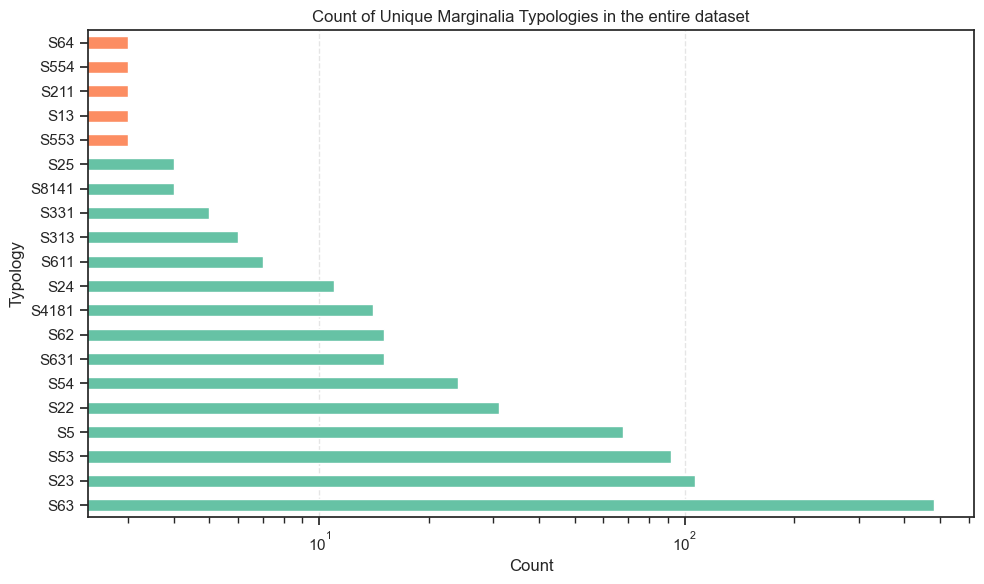

In [385]:
# Count the number of occurrences for each typology in all columns
typology_counts = typologies_marginalia.stack().value_counts()

# Filter typologies based on a threshold of minimum occurrences
threshold = typology_counts.median()
typology_counts_filtered = typology_counts[typology_counts >= threshold]

# Calculate the total count
total_count = typology_counts_filtered.sum()

# Calculate the percentage of each typology
typology_percentages = typology_counts_filtered / total_count * 100

# Sort the typologies by count in descending order
typology_counts_sorted = typology_counts_filtered.sort_values(ascending=False)

# Define the colors from the "Set2" color palette
colors = ['#66C2A5', '#FC8D62']

# Determine the color for each typology based on whether it counts more than the median
typology_colors = typology_counts_sorted.apply(lambda x: colors[0] if x > threshold else colors[1])

# Create a horizontal bar plot for typology percentages with different colors for median and above
plt.figure(figsize=(10, 6))
typology_counts_sorted.plot(kind='barh', color=typology_colors)
plt.xlabel('Count')
plt.ylabel('Typology')
plt.title('Count of Unique Marginalia Typologies in the entire dataset')
plt.xscale('log')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.savefig('graphs/marginalia_typologies_all.png')

plt.show()


In [386]:
# Retrieve the "marginal_note_type" column from each dataframe
col1 = VLO41['gloss_type']
col2 = Bamberg['gloss_type']
col3 = Lat7499['gloss_type']

# Create a new dataframe with the retrieved columns
typologies_glosses = pd.DataFrame({
    'VLO41': col1,
    'Bamberg': col2,
    'Lat7499': col3,
})

# Optional: Rename the columns if desired
typologies_glosses.columns = ['gloss_type_VLO41', 'gloss_type_Bamberg', 'gloss_type_Lat7499']

# Print the new dataframe
typologies_glosses

,gloss_type_VLO41,gloss_type_Bamberg,gloss_type_Lat7499
0,NaN,NaN,NaN
1,S23,S22,S36
2,S22,S22,S22
3,S22,S22,S22
4,S22,S22,S22
...,...,...,...
2026,NaN,S23,NaN
2027,NaN,S221,NaN
2028,NaN,S221,NaN
2029,NaN,S221,NaN


### A logarithmic scale, or log scale, is a way of displaying numerical data where the values on the axis are not evenly spaced, but instead, they are spaced according to the logarithm of the actual values. The logarithm of a number is the exponent to which a specified base must be raised to obtain that number.Using a logarithmic scale can help with visualization in certain situations, particularly when the data spans a wide range of values.A log scale compresses the data and allows for better visualization of large value differences. It helps to avoid situations where very large values overshadow smaller values, making the smaller values appear negligible on a linear scale.

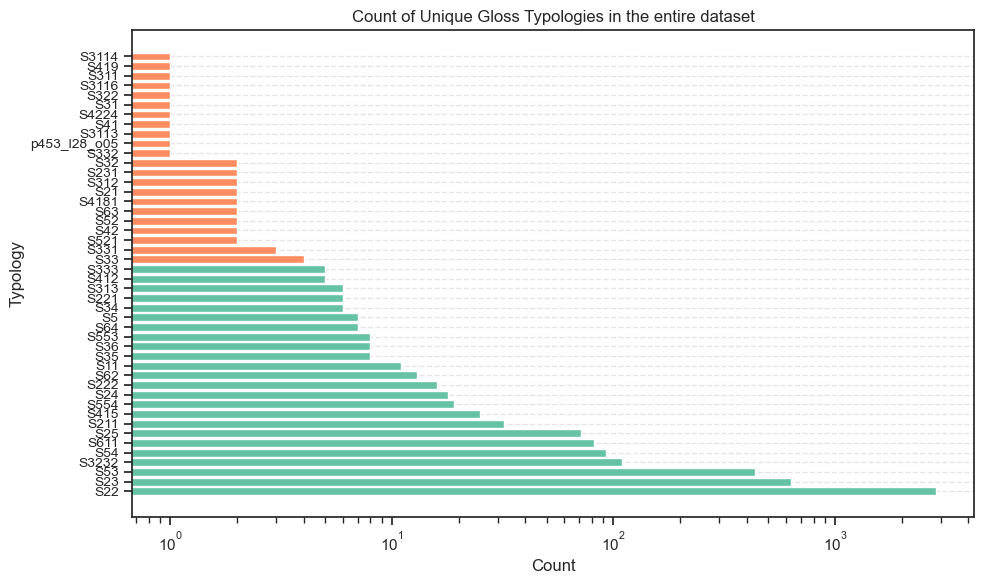

In [387]:
# Count the number of occurrences for each typology in all columns
typology_glosses = typologies_glosses.stack().value_counts()

# Calculate the total count
total_count = typology_glosses.sum()

threshold = typology_glosses.median()

# Calculate the percentage of each typology
typology_percentages = typology_glosses / total_count * 100

# Sort the typologies by count in descending order
typology_sorted = typology_glosses.sort_values(ascending=False)

# Define the colors from the "Set2" color palette
colors = ['#66C2A5', '#FC8D62']

# Determine the color for each typology based on whether it counts more than the threshold
typology_colors = typology_sorted.apply(lambda x: colors[0] if x >= threshold else colors[1])

# Create a horizontal bar plot for typology percentages with different colors for threshold and above
plt.figure(figsize=(10, 6))
plt.barh(typology_sorted.index, typology_sorted, color=typology_colors)
plt.xlabel('Count')
plt.ylabel('Typology')
plt.title('Count of Unique Gloss Typologies in the entire dataset')
plt.xscale('log')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adjust the font size of y-axis labels
plt.yticks(fontsize=10)

plt.tight_layout()
plt.savefig('graphs/gloss_typologies_all.png')
plt.show()


In [388]:
# Assuming your dataframe is named 'df'
typologies_VLO41 = pd.concat([VLO41['gloss_type'], VLO41['marginal_note_type']]).dropna()
typologies_VLO41 = typologies_VLO41.value_counts()
len(typologies_VLO41) #23

23

In [389]:
typologies_Bamberg = pd.concat([Bamberg['gloss_type'], 
                                Bamberg['marginal_note_type']]).dropna()
typologies_Bamberg = typologies_Bamberg.value_counts()
len(typologies_Bamberg) #35

35

In [390]:
typologies_Lat7499 = pd.concat([Lat7499['gloss_type'], 
                                Lat7499['marginal_note_type']]).dropna()
typologies_Lat7499 = typologies_Lat7499.value_counts()
len(typologies_Lat7499) #44

44

In [391]:
typologies_Lat14087 = Lat14087['gloss_type'].dropna()
typologies_Lat14087 = typologies_Lat14087.value_counts()
len(typologies_Lat14087) #11

11

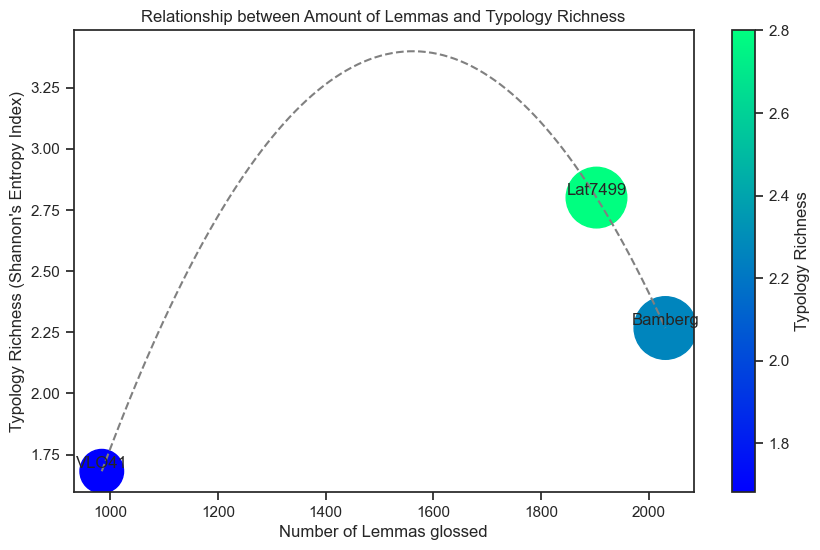

In [392]:
from scipy.stats import entropy

# Define the dataframes
dataframes = [
    VLO41,
    Bamberg,
    #Lat14087,
    Lat7499
]

# Define the names of the dataframes
df_names = [
    'VLO41',
    'Bamberg',
    #'Lat14087',
    'Lat7499'
]

# Calculate the richness/variety of annotations (entropy-based) and text length (number of lemmas) for each DataFrame
annotation_richness = []
lemmas_length = []

for df in dataframes:
    lemmas = df['lemma_id']
    
    if 'marginal_note_type' not in df.columns: # in order to treat the Lat14097 as well that has no marginal_notes
        typologies = df['gloss_type'].dropna()
    else:
        typologies = pd.concat([df['gloss_type'], 
                                df['marginal_note_type']]).dropna()
            
    typologies_counts = typologies.value_counts()
    entropy_val = entropy(typologies_counts, base=2) #log scale
    lemmas_length.append(len(lemmas))
    annotation_richness.append(entropy_val)


# Create a scatter plot to visualize the relationship between text length and richness of annotations
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(lemmas_length, annotation_richness, c=annotation_richness, cmap='winter', s=lemmas_length)

# Add labels for each point on the scatter plot with different colors based on variety
for i, mss in enumerate(df_names):
    ax.annotate(mss, (lemmas_length[i], annotation_richness[i]), ha='center', va='bottom')
    

# Add a curve to represent the non-linear relationship
curve_fit = np.polyfit(lemmas_length, annotation_richness, deg=2) #log scale
curve_x = np.linspace(min(lemmas_length), max(lemmas_length), 100)
curve_y = np.polyval(curve_fit, curve_x)
ax.plot(curve_x, curve_y, color='grey', linestyle='--')

# Set plot labels and title
ax.set_xlabel('Number of Lemmas glossed')
ax.set_ylabel("Typology Richness (Shannon's Entropy Index)")
ax.set_title('Relationship between Amount of Lemmas and Typology Richness')

# Add a colorbar legend
cbar = plt.colorbar(scatter)
cbar.set_label('Typology Richness')

plt.savefig('graphs/lemmas_variety_shannons_entropy_onlywitnesses.png')
plt.show()


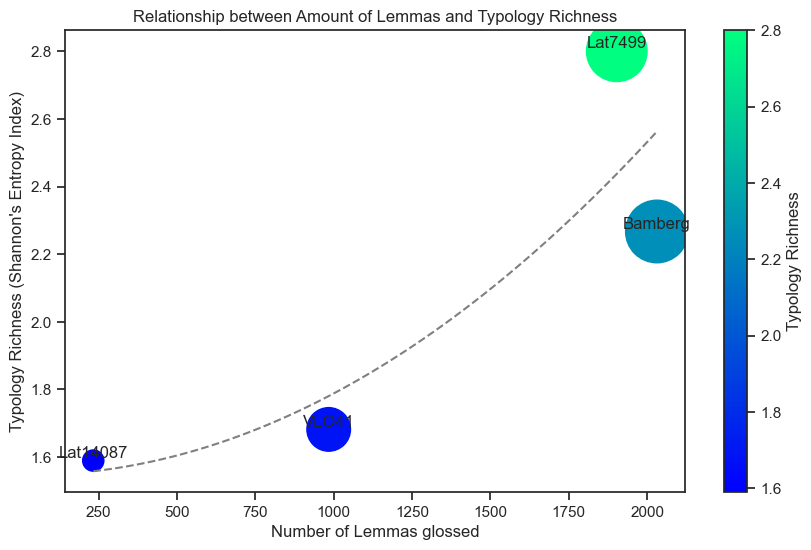

In [393]:
from scipy.stats import entropy

# Define the dataframes
dataframes = [
    VLO41,
    Bamberg,
    Lat14087,
    Lat7499
]

# Define the names of the dataframes
df_names = [
    'VLO41',
    'Bamberg',
    'Lat14087',
    'Lat7499'
]

# Calculate the richness/variety of annotations (entropy-based) and text length (number of lemmas) for each DataFrame
annotation_richness = []
lemmas_length = []

for df in dataframes:
    lemmas = df['lemma_id']
    
    typologies = df['gloss_type']
    
    if 'marginal_note_type' in df.columns:
        typologies = pd.concat([typologies, df['marginal_note_type']]).dropna()
    
    typologies_counts = typologies.value_counts()
    entropy_val = entropy(typologies_counts, base=2)
    lemmas_length.append(len(lemmas))
    annotation_richness.append(entropy_val)


# Create a scatter plot to visualize the relationship between text length and richness of annotations
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(lemmas_length, annotation_richness, c=annotation_richness, cmap='winter', s=lemmas_length)

# Add labels for each point on the scatter plot with different colors based on variety
for i, mss in enumerate(df_names):
    ax.annotate(mss, (lemmas_length[i], annotation_richness[i]), ha='center', va='bottom')
    

# Add a curve to represent the relationship
curve_fit = np.polyfit(lemmas_length, annotation_richness, deg=2)
curve_x = np.linspace(min(lemmas_length), max(lemmas_length), 100)
curve_y = np.polyval(curve_fit, curve_x)
ax.plot(curve_x, curve_y, color='grey', linestyle='--')

# Set plot labels and title
ax.set_xlabel('Number of Lemmas glossed')
ax.set_ylabel("Typology Richness (Shannon's Entropy Index)")
ax.set_title('Relationship between Amount of Lemmas and Typology Richness')

# Add a colorbar legend
cbar = plt.colorbar(scatter)
cbar.set_label('Typology Richness')

plt.savefig('graphs/lemmas_variety_shannons_entropy_withglossary.png')
plt.show()

### Let's start by making one by one comparative applications on typology and form to pairs of manuscritps and then merge everything together

In [394]:
merged_df_VLO_Bamberg = pd.merge(VLO41, Bamberg, on='lemma_id', suffixes=('_VLO41', '_Bamberg'))
merged_df_VLO_Bamberg.to_csv('common_lemmas_csv/common_lemmas_VLO41_Bamberg.csv')
merged_df_VLO_Bamberg

,lemma_id,folio_VLO41,lemma_VLO41,gloss_VLO41,gloss_type_VLO41,gloss_form_VLO41,marginal_note_id_VLO41,marginal_note_type_VLO41,marginal_note_form_VLO41,folio_Bamberg,lemma_Bamberg,gloss_id,gloss_Bamberg,gloss_type_Bamberg,gloss_form_Bamberg,nature,marginal_note_id_Bamberg,marginal_note_type_Bamberg,marginal_note_form_Bamberg
0,p447_l01_o00,02r,INCIPIT LIBER EVTI/CI GRAMMAT(I)CI /DE VERBO,NaN,NaN,NaN,++++/de uer[bo] ++++/[bo]nus contextor,S523,F4,71r,EVTICII,NaN,NaN,NaN,NaN,NaN,p447_l01_o00_a,S54,F5
1,p447_l05_o02,02r,semper,s. cũ frequentia,S23,F3,NaN,NaN,NaN,71r,SEMPER,p447_l05_o02_a,ꝓ sepe,S22,F2,normal,NaN,NaN,NaN
2,p447_l05_o04,02r,nouas quaestiones,novẽ int̃rogaciones,S22,F3,NaN,NaN,NaN,71r,QVĘSTIONES,p447_l05_o04_a,ꝓ positiones,S22,F2,normal,NaN,NaN,NaN
3,p447_l05_o05,02r,doctorib;,p̃ce<ptoribus>,S22,F2,NaN,NaN,NaN,71r,DOCTORIBVS,p447_l05_o05_a,PRAECEP ͭ ͦ ͬ ͥᵇ ͧ ᷤ,S22,F2,shorthand,NaN,NaN,NaN
4,p447_l05_o06,02r,auditorum,iđ discipulorũ,S22,F2,NaN,NaN,NaN,71r,AVDITORVM,p447_l05_o06_a,discipulorũ,S22,F2,normal,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,p470_l23_o05,22r,bacchor,furo ł insanior,S22,F3,NaN,NaN,NaN,80r,Bacchor,p470_l23_o05_a,insanio,S22,F2,normal,p470_l23_o05_b,S63,F2
560,p471_l03_o08,22r,foedus,turpis,S22,F2,NaN,NaN,NaN,80r,Fedus,p471_l03_o08_a,turpis,S22,F2,normal,NaN,NaN,NaN
561,p471_l26_o01,22v,trudo,impello,S22,F2,NaN,NaN,NaN,80r,Trudo,p471_l26_o01_a,indudo,S22,F2,normal,NaN,NaN,NaN
562,p476_l07_o09,25r,pango,NaN,NaN,NaN,ille poematu pconpanpango oratius epistularum ...,S72,F4,81v,pango,p476_l07_o09_a,cõpono,S22,F2,normal,p476_l07_o09_b,S63,F2


In [395]:
# Filter the rows where the conditions are met
common_VLO41_Bamberg = merged_df_VLO_Bamberg[
    (merged_df_VLO_Bamberg['gloss_type_VLO41'] == merged_df_VLO_Bamberg['gloss_type_Bamberg']) &
    ((merged_df_VLO_Bamberg['gloss_form_VLO41'] == merged_df_VLO_Bamberg['gloss_form_Bamberg']) |
    (merged_df_VLO_Bamberg['marginal_note_type_VLO41'] == merged_df_VLO_Bamberg['marginal_note_type_Bamberg']))
]

# Select the desired columns
common_VLO41_Bamberg = common_VLO41_Bamberg[['lemma_id', 'gloss_type_VLO41', 'gloss_type_Bamberg',
                                             'gloss_form_VLO41', 'gloss_form_Bamberg']]

# Merge with merged_df_VLO41_Bamberg to get 'lemma_VLO41' and 'lemma_Bamberg'
common_VLO41_Bamberg = common_VLO41_Bamberg.merge(merged_df_VLO_Bamberg[['lemma_id', 'lemma_VLO41', 'gloss_VLO41', 'lemma_Bamberg', 'gloss_Bamberg']],
                                                  on='lemma_id', how='left')

# Display the new DataFrame
common_VLO41_Bamberg.to_csv('identical_glosses_csv/identical_glosses_VLO41_Bamberg.csv')
common_VLO41_Bamberg

,lemma_id,gloss_type_VLO41,gloss_type_Bamberg,gloss_form_VLO41,gloss_form_Bamberg,lemma_VLO41,gloss_VLO41,lemma_Bamberg,gloss_Bamberg
0,p447_l05_o05,S22,S22,F2,F2,doctorib;,p̃ce<ptoribus>,DOCTORIBVS,PRAECEP ͭ ͦ ͬ ͥᵇ ͧ ᷤ
1,p447_l05_o06,S22,S22,F2,F2,auditorum,iđ discipulorũ,AVDITORVM,discipulorũ
2,p447_l06_o05,S22,S22,F2,F2,curiositas,qͣsi sollicitudo,curiositas,(a cora) sagax sollicitudo
3,p447_l07_o01,S22,S22,F2,F2,desiderat,cupit,desider&,c̃cupiscat
4,p447_l07_o03,S22,S22,F2,F2,recens,nouit(er),recens,nouum
...,...,...,...,...,...,...,...,...,...
237,p466_l22_o02,S22,S22,F2,F2,adipiscor,inueniscor,adipiscor,consequor
238,p468_l15_o10,S22,S22,F2,F2,neco,interficio,neco,int̃ficio
239,p470_l09_o07,S22,S22,F2,F2,glisco,cresco,Glisco,cresco
240,p471_l03_o08,S22,S22,F2,F2,foedus,turpis,Fedus,turpis


In [440]:
merged_df_VLO_Bamberg['page'] = merged_df_VLO_Bamberg['lemma_id'].str.extract(r'(p\d+)')
subset_VLO41Bamberg = merged_df_VLO_Bamberg[['page','lemma_id', 'gloss_form_VLO41','gloss_form_Bamberg']]
subset_VLO41Bamberg = subset_VLO41Bamberg.dropna()

# Convert F1-5 to numerical values 1-5
subset_VLO41Bamberg['gloss_form_VLO41'] = subset_VLO41Bamberg['gloss_form_VLO41'].str.extract('(\d)').astype(int)
subset_VLO41Bamberg['gloss_form_Bamberg'] = subset_VLO41Bamberg['gloss_form_Bamberg'].str.extract('(\d)').astype(int)

# Calculate the stability, increase, and decrease ratios
stable_ratio = (subset_VLO41Bamberg['gloss_form_VLO41'] == subset_VLO41Bamberg['gloss_form_Bamberg']).mean()
increase_ratio = (subset_VLO41Bamberg['gloss_form_VLO41'] < subset_VLO41Bamberg['gloss_form_Bamberg']).mean()
decrease_ratio = (subset_VLO41Bamberg['gloss_form_VLO41'] > subset_VLO41Bamberg['gloss_form_Bamberg']).mean()

# Print the ratios
print("Stable Ratio: {:.2%}".format(stable_ratio))
print("Increase Ratio: {:.2%}".format(increase_ratio))
print("Decrease Ratio: {:.2%}".format(decrease_ratio))

Stable Ratio: 52.86%
Increase Ratio: 19.08%
Decrease Ratio: 28.05%


### More can be done, but let's move to the next one 

In [441]:
merged_df_VLO_Lat7499 = pd.merge(VLO41, Lat7499, on='lemma_id', suffixes=('_VLO41', '_Lat7499'))
merged_df_VLO_Lat7499.to_csv('common_lemmas_csv/common_lemmas_VLO41_Lat7499.csv')
merged_df_VLO_Lat7499

,lemma_id,folio_VLO41,lemma_VLO41,gloss_VLO41,gloss_type_VLO41,gloss_form_VLO41,marginal_note_id_VLO41,marginal_note_type_VLO41,marginal_note_form_VLO41,folio_Lat7499,lemma_Lat7499,gloss_id,gloss_Lat7499,gloss_type_Lat7499,gloss_form_Lat7499,marginal_note_id_Lat7499,marginal_note_type_Lat7499,marginal_note_form_Lat7499
0,p447_l01_o00,02r,INCIPIT LIBER EVTI/CI GRAMMAT(I)CI /DE VERBO,NaN,NaN,NaN,++++/de uer[bo] ++++/[bo]nus contextor,S523,F4,73r,EVTICII,p447_l01_o00_a,Eutex euticis. Inde euticius eutici,S54,F3,NaN,NaN,NaN
1,p447_l05_o02,02r,semper,s. cũ frequentia,S23,F3,NaN,NaN,NaN,73r,SEMPER,p447_l05_o02_a,ꝓ sepe,S22,F2,p447_l05_o02_b,S23,F5
2,p447_l05_o04,02r,nouas quaestiones,novẽ int̃rogaciones,S22,F3,NaN,NaN,NaN,73r,QVESTIONES,p447_l05_o04_a,÷ ꝓpositiones,S22,F2,p447_l05_o04_b,S631,F5
3,p447_l05_o05,02r,doctorib;,p̃ce<ptoribus>,S22,F2,NaN,NaN,NaN,73r,DOCTORIB,p447_l05_o05_a,magistris p̃ceptorib,S22,F3,NaN,NaN,NaN
4,p447_l05_o06,02r,auditorum,iđ discipulorũ,S22,F2,NaN,NaN,NaN,73r,AVDITORṼ,p447_l05_o06_a,discipuloꝵ,S22,F2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,p466_l06_o03,18v,rimor,ꝑscrutor,S22,F2,NaN,NaN,NaN,84v,Rimor,p466_l06_o03_a,inqͥro,S22,F2,NaN,NaN,NaN
639,p466_l21_o09,19r,paciscor,pactũ facio,S23,F4,NaN,NaN,NaN,84v,pacisor,p466_l21_o09_a,pacẽ fatio,S23,F4,NaN,NaN,NaN
640,p466_l22_o02,19r,adipiscor,inueniscor,S22,F2,NaN,NaN,NaN,84v,Adipiscor;,p466_l22_o02_a,consequor inuenio,S22,F3,NaN,NaN,NaN
641,p470_l09_o07,21v,glisco,cresco,S22,F2,NaN,NaN,NaN,85v,Glisco,p470_l09_o07_a,cresco,S22,F2,NaN,NaN,NaN


In [442]:
# Filter the rows where the conditions are met
common_VLO41_Lat7499 = merged_df_VLO_Lat7499[
    (merged_df_VLO_Lat7499['gloss_type_VLO41'] == merged_df_VLO_Lat7499['gloss_type_Lat7499']) &
    ((merged_df_VLO_Lat7499['gloss_form_VLO41'] == merged_df_VLO_Lat7499['gloss_form_Lat7499']) |
    (merged_df_VLO_Lat7499['marginal_note_type_VLO41'] == merged_df_VLO_Lat7499['marginal_note_type_Lat7499']))
]

# Select the desired columns
common_VLO41_Lat7499 = common_VLO41_Lat7499[['lemma_id', 'gloss_type_VLO41', 'gloss_type_Lat7499',
                                             'gloss_form_VLO41', 'gloss_form_Lat7499']]

# Merge with merged_df_VLO41_Bamberg to get 'lemma_VLO41' and 'lemma_Bamberg'
common_VLO41_Lat7499 = common_VLO41_Lat7499.merge(merged_df_VLO_Lat7499[['lemma_id', 'lemma_VLO41', 'gloss_VLO41', 'lemma_Lat7499', 'gloss_Lat7499']],
                                                  on='lemma_id', how='left')

# Display the new DataFrame
common_VLO41_Lat7499.to_csv('identical_glosses_csv/identical_glosses_VLO41_Lat7499.csv')
common_VLO41_Lat7499

,lemma_id,gloss_type_VLO41,gloss_type_Lat7499,gloss_form_VLO41,gloss_form_Lat7499,lemma_VLO41,gloss_VLO41,lemma_Lat7499,gloss_Lat7499
0,p447_l05_o06,S22,S22,F2,F2,auditorum,iđ discipulorũ,AVDITORṼ,discipuloꝵ
1,p447_l05_o08,S22,S22,F3,F3,cõmouere,reperire et excitare,commouere,suscitare incitare
2,p447_l07_o01,S22,S22,F2,F2,desiderat,cupit,desideret,.s. audire
3,p447_l07_o03,S22,S22,F2,F2,recens,nouit(er),recens,Nouũ
4,p447_l09_o05,S553,S553,F3,F3,Cratere,nom̃ ꝓpͥũ,CRATERE,ꝓpͥũ nom̃
...,...,...,...,...,...,...,...,...,...
229,p463_l25_o09,S22,S22,F2,F2,metior,mensuro,metior,÷ mensuro
230,p464_l13_o09,S22,S22,F2,F2,eger,infirmus,ager,infirmꝰ
231,p466_l06_o03,S22,S22,F2,F2,rimor,ꝑscrutor,Rimor,inqͥro
232,p466_l21_o09,S23,S23,F4,F4,paciscor,pactũ facio,pacisor,pacẽ fatio


In [443]:
merged_df_VLO_Lat7499['page'] = merged_df_VLO_Lat7499['lemma_id'].str.extract(r'(p\d+)')
subset_VLO41Lat7499 = merged_df_VLO_Lat7499[['page','lemma_id', 'gloss_form_VLO41','gloss_form_Lat7499']]
subset_VLO41Lat7499 = subset_VLO41Lat7499.dropna()

# Convert F1-5 to numerical values 1-5
subset_VLO41Lat7499['gloss_form_VLO41'] = subset_VLO41Lat7499['gloss_form_VLO41'].str.extract('(\d)').astype(int)
subset_VLO41Lat7499['gloss_form_Lat7499'] = subset_VLO41Lat7499['gloss_form_Lat7499'].str.extract('(\d)').astype(int)

# Calculate the stability, increase, and decrease ratios
stable_ratio = (subset_VLO41Lat7499['gloss_form_VLO41'] == subset_VLO41Lat7499['gloss_form_Lat7499']).mean()
increase_ratio = (subset_VLO41Lat7499['gloss_form_VLO41'] < subset_VLO41Lat7499['gloss_form_Lat7499']).mean()
decrease_ratio = (subset_VLO41Lat7499['gloss_form_VLO41'] > subset_VLO41Lat7499['gloss_form_Lat7499']).mean()

# Print the ratios
print("Stable Ratio: {:.2%}".format(stable_ratio))
print("Increase Ratio: {:.2%}".format(increase_ratio))
print("Decrease Ratio: {:.2%}".format(decrease_ratio))

Stable Ratio: 49.25%
Increase Ratio: 36.15%
Decrease Ratio: 14.59%


### More can be done, but let's move to the next one 

In [444]:
merged_df_VLO_Lat14087 = pd.merge(VLO41, Lat14087, on='lemma_id', suffixes=('_VLO41', '_Lat14087'))
merged_df_VLO_Lat14087.to_csv('common_lemmas_csv/common_lemmas_VLO41_Lat14087.csv')
merged_df_VLO_Lat14087

,lemma_id,folio,lemma,gloss_VLO41,gloss_type_VLO41,gloss_form_VLO41,marginal_note_id,marginal_note_type,marginal_note_form,gloss_Lat14087,gloss_type_Lat14087,gloss_form_Lat14087
0,p447_l05_o05,02r,doctorib;,p̃ce<ptoribus>,S22,F2,NaN,NaN,NaN,Preceptor. doctor ł magifter,S22,F3
1,p447_l05_o06,02r,auditorum,iđ discipulorũ,S22,F2,NaN,NaN,NaN,Adiutor/ discipulus,S23,F2
2,p447_l18_o05,02r,BARIΘONOC,grauis sonus,S211,F3,NaN,NaN,NaN,Barithonos/Aliena atona,S23,F3
3,p448_l02_o08,02r,ΠE/ΡΙCΠΟΜΕΝΕ,ꝑicpomene circũflexibilis,S211,F3,NaN,NaN,NaN,Perspomene. quasi circũ flexo,S211,F3
4,p448_l20_o07,02v,sodes,si audes,S23,F3,NaN,NaN,NaN,si audes,S25,F3
...,...,...,...,...,...,...,...,...,...,...,...,...
136,p465_l28_o07,18r,amitior,tego,S22,F2,NaN,NaN,NaN,Amicior . Vestio circũdo induo togo,S22,F3
137,p466_l05_o04,18v,uador,error,S22,F2,NaN,NaN,NaN,Vador. ꝓmitto. causã ago. fidẽ fatio,S23,F4
138,p466_l21_o09,19r,paciscor,pactũ facio,S23,F4,NaN,NaN,NaN,Pasciscor pacẽ redintegror,S23,F4
139,p466_l22_o02,19r,adipiscor,inueniscor,S22,F2,NaN,NaN,NaN,Adipiscor conor / Nasiciscor Adipiscor Assequor,S22,F3


In [445]:
# Filter the rows where the conditions are met
common_VLO41_Lat14087 = merged_df_VLO_Lat14087[
    (merged_df_VLO_Lat14087['gloss_type_VLO41'] == merged_df_VLO_Lat14087['gloss_type_Lat14087']) &
    ((merged_df_VLO_Lat14087['gloss_form_VLO41'] == merged_df_VLO_Lat14087['gloss_form_Lat14087']))
]

# Select the desired columns
common_VLO41_Lat14087 = common_VLO41_Lat14087[['lemma_id', 'gloss_type_VLO41', 'gloss_type_Lat14087',
                                             'gloss_form_VLO41', 'gloss_form_Lat14087']]

# Merge with merged_df_VLO41_Bamberg to get 'lemma_VLO41' and 'lemma_Bamberg'
common_VLO41_Lat14087 = common_VLO41_Lat14087.merge(merged_df_VLO_Lat14087[['lemma_id', 'lemma', 'gloss_VLO41', 'gloss_Lat14087']],
                                                  on='lemma_id', how='left')

# Display the new DataFrame
common_VLO41_Lat14087.to_csv('identical_glosses_csv/identical_glosses_VLO41_Lat14087.csv')
common_VLO41_Lat14087

,lemma_id,gloss_type_VLO41,gloss_type_Lat14087,gloss_form_VLO41,gloss_form_Lat14087,lemma,gloss_VLO41,gloss_Lat14087
0,p448_l02_o08,S211,S211,F3,F3,ΠE/ΡΙCΠΟΜΕΝΕ,ꝑicpomene circũflexibilis,Perspomene. quasi circũ flexo
1,p450_l02_o04,S22,S22,F2,F2,enucleo,aperio,Nucleo. claudo
2,p450_l06_o07,S22,S22,F2,F2,fatuo,desinio,fatuor hebesco
3,p450_l26_o01,S22,S22,F3,F3,pio,purgo/mundo,Pio purgo placo
4,p451_l11_o04,S22,S22,F3,F3,insignio,orno/redimio,insignior. orno. nobilito
5,p451_l12_o02,S22,S22,F2,F2,Sopio,dormio,Sopio Dormio
6,p451_l12_o03,S22,S22,F2,F2,Ferio,ꝑcucio,Exsicco ł ferio
7,p451_l22_o06,S22,S22,F2,F2,fodio,ꝑforo,fodio ł colligo
8,p451_l23_o05,S22,S22,F2,F2,potior,utor,Potior fruor
9,p452_l16_o06,S22,S22,F3,F3,sacrifico,libo/aliqͣ oblatio,libo sacrifico uel deglisto


In [446]:
merged_df_VLO_Lat14087['page'] = merged_df_VLO_Lat14087['lemma_id'].str.extract(r'(p\d+)')
subset_VLO41Lat14087 = merged_df_VLO_Lat14087[['page','lemma_id', 'gloss_form_VLO41','gloss_form_Lat14087']]
subset_VLO41Lat14087 = subset_VLO41Lat14087.dropna()

# Convert F1-5 to numerical values 1-5
subset_VLO41Lat14087['gloss_form_VLO41'] = subset_VLO41Lat14087['gloss_form_VLO41'].str.extract('(\d)').astype(int)
subset_VLO41Lat14087['gloss_form_Lat14087'] = subset_VLO41Lat14087['gloss_form_Lat14087'].str.extract('(\d)').astype(int)

# Calculate the stability, increase, and decrease ratios
stable_ratio = (subset_VLO41Lat14087['gloss_form_VLO41'] == subset_VLO41Lat14087['gloss_form_Lat14087']).mean()
increase_ratio = (subset_VLO41Lat14087['gloss_form_VLO41'] > subset_VLO41Lat14087['gloss_form_Lat14087']).mean()
decrease_ratio = (subset_VLO41Lat14087['gloss_form_VLO41'] < subset_VLO41Lat14087['gloss_form_Lat14087']).mean()

# Print the ratios
print("Stable Ratio: {:.2%}".format(stable_ratio))
print("Increase Ratio: {:.2%}".format(increase_ratio))
print("Decrease Ratio: {:.2%}".format(decrease_ratio))

Stable Ratio: 37.96%
Increase Ratio: 18.98%
Decrease Ratio: 43.07%


### More can be done, but let's move to the next one 

In [435]:
merged_df_Bamberg_Lat7499 = pd.merge(Bamberg, Lat7499, on='lemma_id', suffixes=('_Bamberg', '_Lat7499'))
merged_df_Bamberg_Lat7499.to_csv('common_lemmas_csv/common_lemmas_Bamberg_Lat7499.csv')
merged_df_Bamberg_Lat7499

,folio_Bamberg,lemma_id,lemma_Bamberg,gloss_id_Bamberg,gloss_Bamberg,gloss_type_Bamberg,gloss_form_Bamberg,nature,marginal_note_id_Bamberg,marginal_note_type_Bamberg,marginal_note_form_Bamberg,folio_Lat7499,lemma_Lat7499,gloss_id_Lat7499,gloss_Lat7499,gloss_type_Lat7499,gloss_form_Lat7499,marginal_note_id_Lat7499,marginal_note_type_Lat7499,marginal_note_form_Lat7499
0,71r,p447_l01_o00,EVTICII,NaN,NaN,NaN,NaN,NaN,p447_l01_o00_a,S54,F5,73r,EVTICII,p447_l01_o00_a,Eutex euticis. Inde euticius eutici,S54,F3,NaN,NaN,NaN
1,71r,p447_l05_o02,SEMPER,p447_l05_o02_a,ꝓ sepe,S22,F2,normal,NaN,NaN,NaN,73r,SEMPER,p447_l05_o02_a,ꝓ sepe,S22,F2,p447_l05_o02_b,S23,F5
2,71r,p447_l05_o04,QVĘSTIONES,p447_l05_o04_a,ꝓ positiones,S22,F2,normal,NaN,NaN,NaN,73r,QVESTIONES,p447_l05_o04_a,÷ ꝓpositiones,S22,F2,p447_l05_o04_b,S631,F5
3,71r,p447_l05_o05,DOCTORIBVS,p447_l05_o05_a,PRAECEP ͭ ͦ ͬ ͥᵇ ͧ ᷤ,S22,F2,shorthand,NaN,NaN,NaN,73r,DOCTORIB,p447_l05_o05_a,magistris p̃ceptorib,S22,F3,NaN,NaN,NaN
4,71r,p447_l05_o06,AVDITORVM,p447_l05_o06_a,discipulorũ,S22,F2,normal,NaN,NaN,NaN,73r,AVDITORṼ,p447_l05_o06_a,discipuloꝵ,S22,F2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,83r,p482_l11_o01-02,in .ror.,NaN,NaN,NaN,NaN,NaN,p482_l11_o01-02_a,S63,F3,89v,in .ror.,NaN,NaN,NaN,NaN,p482_l14_o01-02_a,S63,F1
1091,83r,p482_l14_o01-02,in .so.,NaN,NaN,NaN,NaN,NaN,p482_l14_o01-02_a,S63,F3,89v,In .so.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1092,83v,p483_l20_o04,Exulto,p483_l20_o04_a,l&or,S22,F2,normal,NaN,NaN,NaN,90r,exultat,p483_l20_o04_a,s,S611,F1,NaN,NaN,NaN
1093,84r,p485_l20_o04-05,in .xor.,NaN,NaN,NaN,NaN,NaN,p485_l20_o04-05_a,S63,F2,90v,\n In .xor.,NaN,NaN,NaN,NaN,p485_l20_o04-05_a,S63,F3


### Let's see out of the total common lemmas glossed, how many in Bamberg correspond to tironian sign in regards to the "normal" one in Lat7499. This can a) help determine the degree of tironian signs used as glosses, 2) which lemmas were glossed with tironian signs (is there something that unites them, are there the easiest to shorthand?) 3) determine a degree of material that would appeal to someone familiar with shorthand

In [404]:
tironian_Bamberg_Lat7499 = merged_df_Bamberg_Lat7499[['lemma_id', 'lemma_Bamberg', 'gloss_Bamberg', 'nature', 'lemma_Lat7499', 'gloss_Lat7499']]
tironian_Bamberg_Lat7499 = tironian_Bamberg_Lat7499[tironian_Bamberg_Lat7499['nature'] == 'shorthand']
tironian_Bamberg_Lat7499 = tironian_Bamberg_Lat7499.dropna()
tironian_Bamberg_Lat7499.to_csv('Bamberg_Lat7499_tironian_glosses.csv')

In [405]:
shorthand_rows = Bamberg[Bamberg['nature'] == 'shorthand']

# Count the number of 'shorthand' rows
shorthand_count = len(shorthand_rows)

# Count the total number of rows in the merged DataFrame
total_count = len(merged_df_Bamberg_Lat7499)

tironian_count = len(tironian_Bamberg_Lat7499)

# Calculate the percentage
percentage = (tironian_count / total_count) * 100

# Print the results
print(f"Number of 'shorthand' gloses present in Bamberg: {shorthand_count}")
print(f"Total number of rows of shared lemmas between Bamberg and Lat7499:  {total_count}, out of which :")
print(f"Number of 'tironian' rows in the common Bamberg-Lat7499 dataframe: {tironian_count}")
print(f"Percentage of 'tironian' rows: {percentage:.2f}%")

Number of 'shorthand' gloses present in Bamberg: 270
Total number of rows of shared lemmas between Bamberg and Lat7499:  1095, out of which :
Number of 'tironian' rows in the common Bamberg-Lat7499 dataframe: 152
Percentage of 'tironian' rows: 13.88%


In [406]:
merged_df_Bamberg_Lat7499

,folio_Bamberg,lemma_id,lemma_Bamberg,gloss_id_Bamberg,gloss_Bamberg,gloss_type_Bamberg,gloss_form_Bamberg,nature,marginal_note_id_Bamberg,marginal_note_type_Bamberg,marginal_note_form_Bamberg,folio_Lat7499,lemma_Lat7499,gloss_id_Lat7499,gloss_Lat7499,gloss_type_Lat7499,gloss_form_Lat7499,marginal_note_id_Lat7499,marginal_note_type_Lat7499,marginal_note_form_Lat7499
0,71r,p447_l01_o00,EVTICII,NaN,NaN,NaN,NaN,NaN,p447_l01_o00_a,S54,F5,73r,EVTICII,p447_l01_o00_a,Eutex euticis. Inde euticius eutici,S54,F3,NaN,NaN,NaN
1,71r,p447_l05_o02,SEMPER,p447_l05_o02_a,ꝓ sepe,S22,F2,normal,NaN,NaN,NaN,73r,SEMPER,p447_l05_o02_a,ꝓ sepe,S22,F2,p447_l05_o02_b,S23,F5
2,71r,p447_l05_o04,QVĘSTIONES,p447_l05_o04_a,ꝓ positiones,S22,F2,normal,NaN,NaN,NaN,73r,QVESTIONES,p447_l05_o04_a,÷ ꝓpositiones,S22,F2,p447_l05_o04_b,S631,F5
3,71r,p447_l05_o05,DOCTORIBVS,p447_l05_o05_a,PRAECEP ͭ ͦ ͬ ͥᵇ ͧ ᷤ,S22,F2,shorthand,NaN,NaN,NaN,73r,DOCTORIB,p447_l05_o05_a,magistris p̃ceptorib,S22,F3,NaN,NaN,NaN
4,71r,p447_l05_o06,AVDITORVM,p447_l05_o06_a,discipulorũ,S22,F2,normal,NaN,NaN,NaN,73r,AVDITORṼ,p447_l05_o06_a,discipuloꝵ,S22,F2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,83r,p482_l11_o01-02,in .ror.,NaN,NaN,NaN,NaN,NaN,p482_l11_o01-02_a,S63,F3,89v,in .ror.,NaN,NaN,NaN,NaN,p482_l14_o01-02_a,S63,F1
1091,83r,p482_l14_o01-02,in .so.,NaN,NaN,NaN,NaN,NaN,p482_l14_o01-02_a,S63,F3,89v,In .so.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1092,83v,p483_l20_o04,Exulto,p483_l20_o04_a,l&or,S22,F2,normal,NaN,NaN,NaN,90r,exultat,p483_l20_o04_a,s,S611,F1,NaN,NaN,NaN
1093,84r,p485_l20_o04-05,in .xor.,NaN,NaN,NaN,NaN,NaN,p485_l20_o04-05_a,S63,F2,90v,\n In .xor.,NaN,NaN,NaN,NaN,p485_l20_o04-05_a,S63,F3


### How many identical lemmas do they share?

In [407]:
# Filter the rows where the conditions are met
common_Bamberg_Lat7499 = merged_df_Bamberg_Lat7499[
    (merged_df_Bamberg_Lat7499['gloss_type_Bamberg'] == merged_df_Bamberg_Lat7499['gloss_type_Lat7499']) &
    ((merged_df_Bamberg_Lat7499['gloss_form_Bamberg'] == merged_df_Bamberg_Lat7499['gloss_form_Lat7499']) |
    (merged_df_Bamberg_Lat7499['marginal_note_type_Bamberg'] == merged_df_Bamberg_Lat7499['marginal_note_type_Lat7499']))
]

# Select the desired columns
common_Bamberg_Lat7499 = common_Bamberg_Lat7499[['lemma_id', 'gloss_type_Bamberg', 'gloss_type_Lat7499',
                                             'gloss_form_Bamberg', 'gloss_form_Lat7499']]

# Merge with merged_df_Bamberg_Lat7499 to get 'lemma_Bamberg' and 'lemma_Lat7499'
common_Bamberg_Lat7499 = common_Bamberg_Lat7499.merge(merged_df_Bamberg_Lat7499[['lemma_id', 'lemma_Bamberg', 'gloss_Bamberg', 'lemma_Lat7499', 'gloss_Lat7499']],
                                                  on='lemma_id', how='left')

# Save the result as a CSV file
common_Bamberg_Lat7499.to_csv('identical_glosses_csv/identical_glosses_Bamberg_Lat7499.csv', index=False)

# Display the new DataFrame
common_Bamberg_Lat7499


,lemma_id,gloss_type_Bamberg,gloss_type_Lat7499,gloss_form_Bamberg,gloss_form_Lat7499,lemma_Bamberg,gloss_Bamberg,lemma_Lat7499,gloss_Lat7499
0,p447_l05_o02,S22,S22,F2,F2,SEMPER,ꝓ sepe,SEMPER,ꝓ sepe
1,p447_l05_o04,S22,S22,F2,F2,QVĘSTIONES,ꝓ positiones,QVESTIONES,÷ ꝓpositiones
2,p447_l05_o06,S22,S22,F2,F2,AVDITORVM,discipulorũ,AVDITORṼ,discipuloꝵ
3,p447_l05_o07,S22,S22,F3,F3,ACVTIora,peritiora astutiora /subtiliora VALᵈ ͤ <...?>/...,acutiora,"efficatiora ÷ ualde acuta, peritiora acutiora ..."
4,p447_l07_o01,S22,S22,F2,F2,desider&,c̃cupiscat,desideret,.s. audire
...,...,...,...,...,...,...,...,...,...
516,p472_l09_o01,S22,S22,F2,F2,cedt̃,uerberare,cędunt,uerberant
517,p473_l01_o01,S22,S22,F2,F2,Secundus,prosꝑ,Secunđ,÷ ꝓsꝑ
518,p474_l18_o08,S22,S22,F2,F2,no,nato,no,nato
519,p474_l19_o04,S22,S22,F2,F2,for,loquor,for,loquor


In [447]:
merged_df_Bamberg_Lat7499['page'] = merged_df_Bamberg_Lat7499['lemma_id'].str.extract(r'(p\d+)')
subset_BambergLat7499 = merged_df_Bamberg_Lat7499[['page','lemma_id', 'gloss_form_Lat7499', 'gloss_form_Bamberg']]
subset_BambergLat7499 = subset_BambergLat7499.dropna()
#subset_BambergLat7499

# Convert F1-5 to numerical values 1-5
subset_BambergLat7499['gloss_form_Bamberg'] = subset_BambergLat7499['gloss_form_Bamberg'].str.extract('(\d)').astype(int)
subset_BambergLat7499['gloss_form_Lat7499'] = subset_BambergLat7499['gloss_form_Lat7499'].str.extract('(\d)').astype(int)

# Calculate the stability, increase, and decrease ratios
stable_ratio = (subset_BambergLat7499['gloss_form_Bamberg'] == subset_BambergLat7499['gloss_form_Lat7499']).mean()
increase_ratio = (subset_BambergLat7499['gloss_form_Bamberg'] < subset_BambergLat7499['gloss_form_Lat7499']).mean()
decrease_ratio = (subset_BambergLat7499['gloss_form_Bamberg'] > subset_BambergLat7499['gloss_form_Lat7499']).mean()

# Print the ratios
print("Stable Ratio: {:.2%}".format(stable_ratio))
print("Increase Ratio: {:.2%}".format(increase_ratio))
print("Decrease Ratio: {:.2%}".format(decrease_ratio))

Stable Ratio: 57.04%
Increase Ratio: 35.92%
Decrease Ratio: 7.04%


### More can be done, but let's move to the next one 


In [436]:
merged_df_Bamberg_Lat14087 = pd.merge(Bamberg, Lat14087, on='lemma_id', suffixes=('_Bamberg', '_Lat14087'))
merged_df_Bamberg_Lat14087.to_csv('common_lemmas_csv/common_lemmas_Bamberg_Lat14087.csv')
merged_df_Bamberg_Lat14087

,folio,lemma_id,lemma,gloss_id,gloss_Bamberg,gloss_type_Bamberg,gloss_form_Bamberg,nature,marginal_note_id,marginal_note_type,marginal_note_form,gloss_Lat14087,gloss_type_Lat14087,gloss_form_Lat14087
0,71r,p447_l05_o05,DOCTORIBVS,p447_l05_o05_a,PRAECEP ͭ ͦ ͬ ͥᵇ ͧ ᷤ,S22,F2,shorthand,NaN,NaN,NaN,Preceptor. doctor ł magifter,S22,F3
1,71r,p447_l05_o06,AVDITORVM,p447_l05_o06_a,discipulorũ,S22,F2,normal,NaN,NaN,NaN,Adiutor/ discipulus,S23,F2
2,71r,p447_l18_o05,barutonos,p447_l18_o05_a,bari apud g̃cos dr̃ grauis tonos accentꝰ inde/...,S211,F4,normal,NaN,NaN,NaN,Barithonos/Aliena atona,S23,F3
3,71r,p448_l02_o08,ꝑispomene,p448_l02_o08_a,peri DIC ͥ ͭ ͧ ͬ circũ UNDE perispomene IDEST...,S211,F4,normal,NaN,NaN,NaN,Perspomene. quasi circũ flexo,S211,F3
4,71r,p448_l20_o07,sodes,p448_l20_o07_a,si audes,S25,F3,normal,NaN,NaN,NaN,si audes,S25,F3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,80r,p471_l06_o01,delapido,p471_l06_o01_a,defraudo,S22,F2,normal,p471_l06_o01_b,S63,F2,Delapido Erogo ꝓdico ꝑdo exhaurio consumo sup...,S22,F3
161,80r,p471_l17_o02,Rodo,p471_l17_o02_a,deuoro,S22,F2,normal,NaN,NaN,NaN,Rodo mordeo,S22,F2
162,82v,p480_l15_o11,aucupor,p480_l15_o11_a,uenare ł aues capio,S23,F4,normal,p480_l15_o11_b,S63,F3,Aucupor affecto. lnsdior Adipiscor conor.,S22,F3
163,83r,p481_l09_o03,lacero,p481_l09_o03_a,lanio,S22,F2,normal,NaN,NaN,NaN,lacero ł iterimo,S22,F2


In [437]:
# Filter the rows where the conditions are met
common_Bamberg_Lat14087 = merged_df_Bamberg_Lat14087[
    (merged_df_Bamberg_Lat14087['gloss_type_Bamberg'] == merged_df_Bamberg_Lat14087['gloss_type_Lat14087']) &
    ((merged_df_Bamberg_Lat14087['gloss_form_Bamberg'] == merged_df_Bamberg_Lat14087['gloss_form_Lat14087']) )
]

# Select the desired columns
common_Bamberg_Lat14087 = common_Bamberg_Lat14087[['lemma_id', 'gloss_type_Bamberg', 'gloss_type_Lat14087',
                                             'gloss_form_Bamberg', 'gloss_form_Lat14087']]

# Merge with merged_df_Bamberg_Lat7499 to get 'lemma_Bamberg' and 'lemma_Lat7499'
common_Bamberg_Lat14087 = common_Bamberg_Lat14087.merge(merged_df_Bamberg_Lat14087[['lemma_id', 'lemma', 'gloss_Bamberg', 'gloss_Lat14087']],
                                                  on='lemma_id', how='left')

# Save the result as a CSV file
common_Bamberg_Lat14087.to_csv('identical_glosses_csv/identical_glosses_Bamberg_Lat14087.csv', index=False)

# Display the new DataFrame
common_Bamberg_Lat14087

,lemma_id,gloss_type_Bamberg,gloss_type_Lat14087,gloss_form_Bamberg,gloss_form_Lat14087,lemma,gloss_Bamberg,gloss_Lat14087
0,p448_l20_o07,S25,S25,F3,F3,sodes,si audes,si audes
1,p450_l02_o04,S22,S22,F2,F2,enucleo,manifesto,Nucleo. claudo
2,p450_l06_o07,S22,S22,F2,F2,fatuo,hębeo,fatuor hebesco
3,p450_l20_o04,S22,S22,F2,F2,delinio,blandior,Delinior blandior
4,p451_l10_o02,S23,S23,F4,F4,pręsagio,futura p̃dico,P̃dico. cis. futura. antedico . P̃dico cas; de...
5,p451_l12_o02,S22,S22,F2,F2,sopio,dormio,Sopio Dormio
6,p451_l12_o03,S22,S22,F2,F2,ferio,ꝑcutio,Exsicco ł ferio
7,p451_l12_o07,S22,S22,F2,F2,ligurrio,lingo,Ligurrio deglutio
8,p451_l23_o05,S22,S22,F2,F2,potior,fruor,Potior fruor
9,p452_l21_o01,S22,S22,F2,F2,Obsequor,obtẽpero,Obsequor famulor


In [448]:
merged_df_Bamberg_Lat14087['page'] = merged_df_Bamberg_Lat14087['lemma_id'].str.extract(r'(p\d+)')
subset_Bamberg_Lat14087 = merged_df_Bamberg_Lat14087[['page','lemma_id', 'gloss_form_Bamberg', 'gloss_form_Lat14087']]
subset_Bamberg_Lat14087 = subset_Bamberg_Lat14087.dropna()
# Calculate the stability, increase, and decrease ratios
stable_ratio = (subset_Bamberg_Lat14087['gloss_form_Bamberg'] == subset_Bamberg_Lat14087['gloss_form_Lat14087']).mean()
increase_ratio = (subset_Bamberg_Lat14087['gloss_form_Bamberg'] > subset_Bamberg_Lat14087['gloss_form_Lat14087']).mean()
decrease_ratio = (subset_Bamberg_Lat14087['gloss_form_Bamberg'] < subset_Bamberg_Lat14087['gloss_form_Lat14087']).mean()

# Print the ratios
print("Stable Ratio: {:.2%}".format(stable_ratio))
print("Increase Ratio: {:.2%}".format(increase_ratio))
print("Decrease Ratio: {:.2%}".format(decrease_ratio))


Stable Ratio: 37.58%
Increase Ratio: 10.83%
Decrease Ratio: 51.59%


### More can be done, but let's move to the next one 


In [412]:
merged_df_Lat14087_Lat7499 = pd.merge(Lat14087, Lat7499, on='lemma_id', suffixes=('_Lat14087', '_Lat7499'))
merged_df_Lat14087_Lat7499.to_csv('common_lemmas_csv/common_lemmas_Lat7499_Lat14087.csv')
merged_df_Lat14087_Lat7499

,lemma_id,gloss_Lat14087,gloss_type_Lat14087,gloss_form_Lat14087,folio,lemma,gloss_id,gloss_Lat7499,gloss_type_Lat7499,gloss_form_Lat7499,marginal_note_id,marginal_note_type,marginal_note_form
0,p447_l05_o05,Preceptor. doctor ł magifter,S22,F3,73r,DOCTORIB,p447_l05_o05_a,magistris p̃ceptorib,S22,F3,NaN,NaN,NaN
1,p447_l05_o06,Adiutor/ discipulus,S23,F2,73r,AVDITORṼ,p447_l05_o06_a,discipuloꝵ,S22,F2,NaN,NaN,NaN
2,p447_l18_o05,Barithonos/Aliena atona,S23,F3,73r,ΒΑΡΙΤΟΝΑ,p447_l18_o05_a,grauisona,S211,F2,NaN,NaN,NaN
3,p448_l02_o08,Perspomene. quasi circũ flexo,S211,F3,73r,ΠΕΡΙCΠΩΜΕΝΗ,p448_l02_o08_a,cirũflexibils; ΠΕΡΙCΠΩ ÷ circũfleto/ΠΕΡΙ dr̃ c...,S211,F4,NaN,NaN,NaN
4,p448_l20_o07,si audes,S25,F3,73v,Sodes,p448_l20_o07_a,si audes,S25,F3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,p466_l21_o09,Pasciscor pacẽ redintegror,S23,F4,84v,pacisor,p466_l21_o09_a,pacẽ fatio,S23,F4,NaN,NaN,NaN
164,p466_l22_o02,Adipiscor conor / Nasiciscor Adipiscor Assequor,S22,F3,84v,Adipiscor;,p466_l22_o02_a,consequor inuenio,S22,F3,NaN,NaN,NaN
165,p467_l07_o05,Neo filator queo,S22,F3,84v,neo,p467_l07_o05_a,filo,S22,F2,NaN,NaN,NaN
166,p468_l34_o08,edico cis p̃dico p̃nuntio ł p̃cipio,S22,F3,85v,Edico,p468_l34_o08_a,ualde dico,S23,F4,NaN,NaN,NaN


In [413]:
# Filter the rows where the conditions are met
common_Lat14087_Lat7499 = merged_df_Lat14087_Lat7499[
    (merged_df_Lat14087_Lat7499['gloss_type_Lat14087'] == merged_df_Lat14087_Lat7499['gloss_type_Lat7499']) &
    ((merged_df_Lat14087_Lat7499['gloss_form_Lat14087'] == merged_df_Lat14087_Lat7499['gloss_form_Lat7499']) )
]

common_Lat14087_Lat7499

# Select the desired columns
common_Lat14087_Lat7499 = common_Lat14087_Lat7499[['lemma_id', 'gloss_type_Lat14087', 'gloss_type_Lat7499',
                                             'gloss_form_Lat14087', 'gloss_form_Lat7499']]


# Merge with merged_df_Bamberg_Lat7499 to get 'lemma_Bamberg' and 'lemma_Lat7499'
common_Lat14087_Lat7499 = common_Lat14087_Lat7499.merge(merged_df_Lat14087_Lat7499[['lemma_id', 'lemma', 'gloss_Lat14087', 'gloss_Lat7499']],
                                                  on='lemma_id', how='left')

# Save the result as a CSV file
common_Lat14087_Lat7499.to_csv('identical_glosses_csv/identical_glosses_Lat14087Lat7499.csv', index=False)

# Display the new DataFrame
common_Lat14087_Lat7499

,lemma_id,gloss_type_Lat14087,gloss_type_Lat7499,gloss_form_Lat14087,gloss_form_Lat7499,lemma,gloss_Lat14087,gloss_Lat7499
0,p447_l05_o05,S22,S22,F3,F3,DOCTORIB,Preceptor. doctor ł magifter,magistris p̃ceptorib
1,p448_l20_o07,S25,S25,F3,F3,Sodes,si audes,si audes
2,p449_l12_o03,S553,S553,F3,F3,protheus,ꝓtheus pastor quidã,ꝓpũ nom̃
3,p450_l02_o01,S22,S22,F3,F3,Meo,Defluo Decurro mano,transeo/ãbulo
4,p450_l20_o04,S22,S22,F2,F2,Delinio,Delinior blandior,blandior
5,p450_l22_o07,S23,S23,F3,F3,Depretio,Deprecio / uilẽfacio,uilẽ facio
6,p451_l12_o03,S22,S22,F2,F2,Ferio,Exsicco ł ferio,ꝑcutio
7,p451_l13_o03,S22,S22,F2,F2,Haurio,Haurio.Euacuo,ꝓpino
8,p451_l23_o05,S22,S22,F2,F2,potior,Potior fruor,possideo
9,p452_l18_o07,S22,S22,F3,F3,Pręsideo,P̃sideo ꝓtego subleuo opitulor. suffragor ł ꝓp...,antesedeo/seu pręsum


In [414]:
merged_df_full = pd.merge(merged_df_VLO_Bamberg, Lat7499, on='lemma_id', suffixes=('','_Latin7499'))
merged_df_full.to_csv('common_lemmas_csv/full_comp_mss_without_glossary.csv', index=False)
merged_df_full

,lemma_id,folio_VLO41,lemma_VLO41,gloss_VLO41,gloss_type_VLO41,gloss_form_VLO41,marginal_note_id_VLO41,marginal_note_type_VLO41,marginal_note_form_VLO41,folio_Bamberg,...,page,folio,lemma,gloss_id_Latin7499,gloss,gloss_type,gloss_form,marginal_note_id,marginal_note_type,marginal_note_form
0,p447_l01_o00,02r,INCIPIT LIBER EVTI/CI GRAMMAT(I)CI /DE VERBO,NaN,NaN,NaN,++++/de uer[bo] ++++/[bo]nus contextor,S523,F4,71r,...,p447,73r,EVTICII,p447_l01_o00_a,Eutex euticis. Inde euticius eutici,S54,F3,NaN,NaN,NaN
1,p447_l05_o02,02r,semper,s. cũ frequentia,S23,F3,NaN,NaN,NaN,71r,...,p447,73r,SEMPER,p447_l05_o02_a,ꝓ sepe,S22,F2,p447_l05_o02_b,S23,F5
2,p447_l05_o04,02r,nouas quaestiones,novẽ int̃rogaciones,S22,F3,NaN,NaN,NaN,71r,...,p447,73r,QVESTIONES,p447_l05_o04_a,÷ ꝓpositiones,S22,F2,p447_l05_o04_b,S631,F5
3,p447_l05_o05,02r,doctorib;,p̃ce<ptoribus>,S22,F2,NaN,NaN,NaN,71r,...,p447,73r,DOCTORIB,p447_l05_o05_a,magistris p̃ceptorib,S22,F3,NaN,NaN,NaN
4,p447_l05_o06,02r,auditorum,iđ discipulorũ,S22,F2,NaN,NaN,NaN,71r,...,p447,73r,AVDITORṼ,p447_l05_o06_a,discipuloꝵ,S22,F2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,p466_l06_o03,18v,rimor,ꝑscrutor,S22,F2,NaN,NaN,NaN,78v,...,p466,84v,Rimor,p466_l06_o03_a,inqͥro,S22,F2,NaN,NaN,NaN
493,p466_l21_o09,19r,paciscor,pactũ facio,S23,F4,NaN,NaN,NaN,78v,...,p466,84v,pacisor,p466_l21_o09_a,pacẽ fatio,S23,F4,NaN,NaN,NaN
494,p466_l22_o02,19r,adipiscor,inueniscor,S22,F2,NaN,NaN,NaN,78v,...,p466,84v,Adipiscor;,p466_l22_o02_a,consequor inuenio,S22,F3,NaN,NaN,NaN
495,p470_l09_o07,21v,glisco,cresco,S22,F2,NaN,NaN,NaN,80r,...,p470,85v,Glisco,p470_l09_o07_a,cresco,S22,F2,NaN,NaN,NaN


In [415]:
merged_df_all=pd.merge(merged_df_full, Lat14087, on='lemma_id', suffixes=('','_Latin14087'))
merged_df_all.to_csv('common_lemmas_csv/full_comp_mss_with_glossary.csv', index=False)
merged_df_all

,lemma_id,folio_VLO41,lemma_VLO41,gloss_VLO41,gloss_type_VLO41,gloss_form_VLO41,marginal_note_id_VLO41,marginal_note_type_VLO41,marginal_note_form_VLO41,folio_Bamberg,...,gloss_id_Latin7499,gloss,gloss_type,gloss_form,marginal_note_id,marginal_note_type,marginal_note_form,gloss_Latin14087,gloss_type_Latin14087,gloss_form_Latin14087
0,p447_l05_o05,02r,doctorib;,p̃ce<ptoribus>,S22,F2,NaN,NaN,NaN,71r,...,p447_l05_o05_a,magistris p̃ceptorib,S22,F3,NaN,NaN,NaN,Preceptor. doctor ł magifter,S22,F3
1,p447_l05_o06,02r,auditorum,iđ discipulorũ,S22,F2,NaN,NaN,NaN,71r,...,p447_l05_o06_a,discipuloꝵ,S22,F2,NaN,NaN,NaN,Adiutor/ discipulus,S23,F2
2,p447_l18_o05,02r,BARIΘONOC,grauis sonus,S211,F3,NaN,NaN,NaN,71r,...,p447_l18_o05_a,grauisona,S211,F2,NaN,NaN,NaN,Barithonos/Aliena atona,S23,F3
3,p448_l02_o08,02r,ΠE/ΡΙCΠΟΜΕΝΕ,ꝑicpomene circũflexibilis,S211,F3,NaN,NaN,NaN,71r,...,p448_l02_o08_a,cirũflexibils; ΠΕΡΙCΠΩ ÷ circũfleto/ΠΕΡΙ dr̃ c...,S211,F4,NaN,NaN,NaN,Perspomene. quasi circũ flexo,S211,F3
4,p448_l20_o07,02v,sodes,si audes,S23,F3,NaN,NaN,NaN,71r,...,p448_l20_o07_a,si audes,S25,F3,NaN,NaN,NaN,si audes,S25,F3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,p465_l25_o11,18r,polliceor,ꝓmitto,S22,F2,NaN,NaN,NaN,78r,...,p465_l25_o11_a,ꝓmitto spondeo,S22,F3,NaN,NaN,NaN,ꝓmitto polliceor.,S22,F2
97,p465_l28_o07,18r,amitior,tego,S22,F2,NaN,NaN,NaN,78r,...,p465_l28_o07_a,circũdo induco Ab amicus ł amictus,S54,F3,NaN,NaN,NaN,Amicior . Vestio circũdo induo togo,S22,F3
98,p466_l05_o04,18v,uador,error,S22,F2,NaN,NaN,NaN,78v,...,p466_l05_o04_a,a uado,S54,F3,NaN,NaN,NaN,Vador. ꝓmitto. causã ago. fidẽ fatio,S23,F4
99,p466_l21_o09,19r,paciscor,pactũ facio,S23,F4,NaN,NaN,NaN,78v,...,p466_l21_o09_a,pacẽ fatio,S23,F4,NaN,NaN,NaN,Pasciscor pacẽ redintegror,S23,F4


### Let's omit the glossary for now and focus on the manuscripts. I'll put them in chronological order to track the evolution of the diffusion of annotations

### Accumulation of synonyms 

In [416]:
full_S22_form = merged_df_full[
    (merged_df_full['gloss_type_VLO41'] == 'S22') &
    (merged_df_full['gloss_type_Bamberg'] == 'S22') &
    (merged_df_full['gloss_type'] == 'S22')
][['lemma_id','lemma_VLO41', 'gloss_VLO41', 'gloss_type_VLO41', 'gloss_form_VLO41', 'gloss_Bamberg', 'gloss_type_Bamberg', 'gloss_form_Bamberg', 'gloss', 'gloss_type', 'gloss_form']]


In [417]:
full_S22_form

,lemma_id,lemma_VLO41,gloss_VLO41,gloss_type_VLO41,gloss_form_VLO41,gloss_Bamberg,gloss_type_Bamberg,gloss_form_Bamberg,gloss,gloss_type,gloss_form
2,p447_l05_o04,nouas quaestiones,novẽ int̃rogaciones,S22,F3,ꝓ positiones,S22,F2,÷ ꝓpositiones,S22,F2
3,p447_l05_o05,doctorib;,p̃ce<ptoribus>,S22,F2,PRAECEP ͭ ͦ ͬ ͥᵇ ͧ ᷤ,S22,F2,magistris p̃ceptorib,S22,F3
4,p447_l05_o06,auditorum,iđ discipulorũ,S22,F2,discipulorũ,S22,F2,discipuloꝵ,S22,F2
5,p447_l05_o07,acutiora,perspicatiora,S22,F2,peritiora astutiora /subtiliora VALᵈ ͤ <...?>/...,S22,F3,"efficatiora ÷ ualde acuta, peritiora acutiora ...",S22,F3
6,p447_l05_o08,cõmouere,reperire et excitare,S22,F3,incitare,S22,F2,suscitare incitare,S22,F3
...,...,...,...,...,...,...,...,...,...,...,...
491,p466_l05_o06,suffragor,auxilior,S22,F2,auxilior,S22,F2,a suffragio ÷ auxilior,S22,F3
492,p466_l06_o03,rimor,ꝑscrutor,S22,F2,inuestigo,S22,F2,inqͥro,S22,F2
494,p466_l22_o02,adipiscor,inueniscor,S22,F2,consequor,S22,F2,consequor inuenio,S22,F3
495,p470_l09_o07,glisco,cresco,S22,F2,cresco,S22,F2,cresco,S22,F2


In [418]:
# Manually Create masks for increasing, decreasing, and stable tendencies
increasing_mask = (
    ((full_S22_form['gloss_form_VLO41'] == 'F2') & (full_S22_form['gloss_form_Bamberg'] == 'F3') & (full_S22_form['gloss_form'] == 'F3')) |
    ((full_S22_form['gloss_form_VLO41'] == 'F2') & (full_S22_form['gloss_form_Bamberg'] == 'F2') & (full_S22_form['gloss_form'] == 'F3'))
)

decreasing_mask = (
    ((full_S22_form['gloss_form_VLO41'] == 'F3') & (full_S22_form['gloss_form_Bamberg'] == 'F2') & (full_S22_form['gloss_form'] == 'F2')) |
    ((full_S22_form['gloss_form_VLO41'] == 'F3') & (full_S22_form['gloss_form_Bamberg'] == 'F3') & (full_S22_form['gloss_form'] == 'F2'))
)

stable_mask = (
    ((full_S22_form['gloss_form_VLO41'] == 'F2') & (full_S22_form['gloss_form_Bamberg'] == 'F2') & (full_S22_form['gloss_form'] == 'F2')) |
    ((full_S22_form['gloss_form_VLO41'] == 'F3') & (full_S22_form['gloss_form_Bamberg'] == 'F3') & (full_S22_form['gloss_form'] == 'F3')) |
    ((full_S22_form['gloss_form_VLO41'] == 'F2') & (full_S22_form['gloss_form_Bamberg'] == 'F3') & (full_S22_form['gloss_form'] == 'F2'))
)

# Apply the masks to filter the rows
increasing_cases = full_S22_form[increasing_mask]
decreasing_cases = full_S22_form[decreasing_mask]
stable_cases = full_S22_form[stable_mask]

# Get the counts of each tendency
increasing_count = len(increasing_cases)
decreasing_count = len(decreasing_cases)
stable_count = len(stable_cases)

In [419]:
decreasing_cases.to_csv('decreasing_synonyms.csv')
#decreasing_cases

/var/folders/ps/09_p7rl14y11qx52mcmvrr_w0000gq/T/ipykernel_37034/3968072630.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


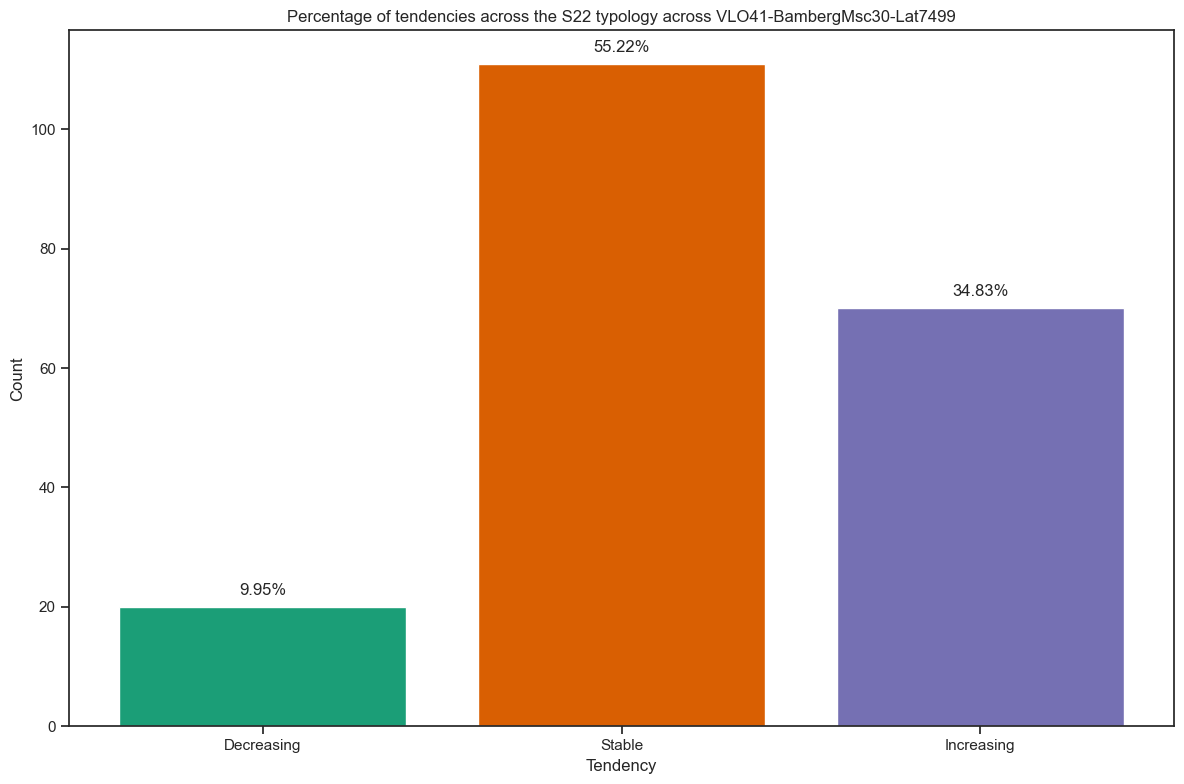

In [420]:
# Calculate the total count
total_count = decreasing_count + stable_count + increasing_count

# Calculate the percentages
decreasing_percentage = (decreasing_count / total_count) * 100
stable_percentage = (stable_count / total_count) * 100
increasing_percentage = (increasing_count / total_count) * 100

# Create a larger figure with a cute style
plt.figure(figsize=(12, 8))
plt.style.use('seaborn-pastel')

# Create a bar plot to visualize the counts
tendencies = ['Decreasing', 'Stable', 'Increasing']
counts = [decreasing_count, stable_count, increasing_count]
percentages = [decreasing_percentage, stable_percentage, increasing_percentage]
colors = ['#1B9E77', '#D95F02', '#7570B3']

plt.bar(tendencies, counts, color=colors)
plt.xlabel('Tendency')
plt.ylabel('Count')
plt.title('Percentage of tendencies across the S22 typology across VLO41-BambergMsc30-Lat7499')

# Add percentages on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count + 2, f'{percentages[i]:.2f}%', ha='center')

plt.tight_layout()

plt.savefig('graphs/tendencies_S22_form_across_mss')
plt.show()

### Let's explore now the percentages of accretion of the information from the interlinear to the marginal space.

In [421]:
#From the datadrame that contains the common lemmas in our three glossed manuscripts, we isolate the columns for the glosses and the marginalia.
merged_VLO41_Bamberg_gloss_to_marginalia = merged_df_VLO_Bamberg[['lemma_id', 'gloss_VLO41', 'gloss_Bamberg', 'marginal_note_id_VLO41', 'marginal_note_id_Bamberg']]
merged_VLO41_Bamberg_gloss_to_marginalia = merged_VLO41_Bamberg_gloss_to_marginalia.dropna(subset=merged_VLO41_Bamberg_gloss_to_marginalia.columns[3:], how='all') #drop row if all marginal is NaN
merged_VLO41_Bamberg_gloss_to_marginalia

,lemma_id,gloss_VLO41,gloss_Bamberg,marginal_note_id_VLO41,marginal_note_id_Bamberg
0,p447_l01_o00,NaN,NaN,++++/de uer[bo] ++++/[bo]nus contextor,p447_l01_o00_a
9,p447_l06_o07,ĩ specialit̃ ⁊ ꝓprie aderens,adherens/ingenita (intꝰ genita) amica,ĩ afinis & cognata,NaN
16,p447_l10_o01,iđ doctrina /eloquentia,eloquentia,facundu᷑ uocit᷑ eo qđ facile fari/potest. for ...,p447_l10_o01_b
50,p448_l20_o09,qͣsi ꝑcutit,ꝑcutit,NaN,p448_l20_o09_b
56,p449_l01_o04,ruere,labere ID EST CAD ͤ ͬ ͤ INCIPI ͦ,NaN,p449_l01_o04_b
...,...,...,...,...,...
556,p468_l32_o04,dono,NaN,NaN,p468_l32_o04_a
557,p470_l09_o07,cresco,cresco,NaN,p470_l09_o07_b
558,p470_l11_o06,nutrio,NaN,NaN,p470_l11_o06_a
559,p470_l23_o05,furo ł insanior,insanio,NaN,p470_l23_o05_b


In [422]:
#From the datadrame that contains the common lemmas in our three glossed manuscripts, we isolate the columns for the glosses and the marginalia.
merged_VLO41_Lat7499_gloss_to_marginalia = merged_df_VLO_Lat7499[['lemma_id', 'gloss_VLO41', 'gloss_Lat7499', 'marginal_note_id_VLO41', 'marginal_note_id_Lat7499']]
merged_VLO41_Lat7499_gloss_to_marginalia = merged_VLO41_Lat7499_gloss_to_marginalia.dropna(subset=merged_VLO41_Lat7499_gloss_to_marginalia.columns[3:], how='all') #drop row if all marginal is NaN
merged_VLO41_Lat7499_gloss_to_marginalia

,lemma_id,gloss_VLO41,gloss_Lat7499,marginal_note_id_VLO41,marginal_note_id_Lat7499
0,p447_l01_o00,NaN,Eutex euticis. Inde euticius eutici,++++/de uer[bo] ++++/[bo]nus contextor,NaN
1,p447_l05_o02,s. cũ frequentia,ꝓ sepe,NaN,p447_l05_o02_b
2,p447_l05_o04,novẽ int̃rogaciones,÷ ꝓpositiones,NaN,p447_l05_o04_b
8,p447_l06_o05,qͣsi sollicitudo,.s. sagax sollicitudo,NaN,p447_l06_o05_b
9,p447_l06_o07,ĩ specialit̃ ⁊ ꝓprie aderens,ingenieta et adhęrens,ĩ afinis & cognata,NaN
...,...,...,...,...,...
605,p462_l26_o03,senesco,albeo,NaN,p462_l26_o03_b
607,p462_l28_o06,instruo doceo,ostendo ł rep̃hendo,NaN,p462_l28_o06_b
614,p462_l29_o11,titubo,titubo,NaN,p462_l29_o11_b
617,p463_l08_o06,NaN,ornam̃tũ camelorũ si/ue uesicule in aqua,bulla dr̃ q: sit a uento/ł ornam̃tũ cingulorum,NaN


In [423]:
#From the datadrame that contains the common lemmas in our three glossed manuscripts, we isolate the columns for the glosses and the marginalia.
merged_Bamberg_Lat7499_gloss_to_marginalia = merged_df_Bamberg_Lat7499[['lemma_id', 'gloss_Bamberg', 'gloss_Lat7499', 'marginal_note_id_Bamberg', 'marginal_note_id_Lat7499']]
merged_Bamberg_Lat7499_gloss_to_marginalia = merged_Bamberg_Lat7499_gloss_to_marginalia.dropna(subset=merged_Bamberg_Lat7499_gloss_to_marginalia.columns[3:], how='all') #drop row if all marginal is NaN
merged_Bamberg_Lat7499_gloss_to_marginalia

,lemma_id,gloss_Bamberg,gloss_Lat7499,marginal_note_id_Bamberg,marginal_note_id_Lat7499
0,p447_l01_o00,NaN,Eutex euticis. Inde euticius eutici,p447_l01_o00_a,NaN
1,p447_l05_o02,ꝓ sepe,ꝓ sepe,NaN,p447_l05_o02_b
2,p447_l05_o04,ꝓ positiones,÷ ꝓpositiones,NaN,p447_l05_o04_b
8,p447_l06_o05,(a cora) sagax sollicitudo,.s. sagax sollicitudo,NaN,p447_l06_o05_b
13,p447_l07_o05,aliquo modo,qualicũqmodo ł aliquo modo,NaN,p447_l07_o05_b
...,...,...,...,...,...
1088,p480_l05_o01-02,NaN,NaN,p480_l05_o01-02_a,p480_l05_o01-02_a
1089,p481_l08_o01-02,NaN,NaN,p481_l08_o01-02_a,p481_l08_o01-02_a
1090,p482_l11_o01-02,NaN,NaN,p482_l11_o01-02_a,p482_l14_o01-02_a
1091,p482_l14_o01-02,NaN,NaN,p482_l14_o01-02_a,NaN


In [424]:
# Rows where gloss_VLO41 has None marginal_note_id_VLO41 and marginal_note_id_Bamberg is not None
condition_1 = (merged_VLO41_Bamberg_gloss_to_marginalia['marginal_note_id_VLO41'].isna()) & (~merged_VLO41_Bamberg_gloss_to_marginalia['marginal_note_id_Bamberg'].isna())
subset_1 = merged_VLO41_Bamberg_gloss_to_marginalia[condition_1] 

# Count of rows with None marginal_note_id_VLO41 and non-None marginal_note_id_Bamberg
count_1 = subset_1.shape[0]#132

condition_2 = (merged_Bamberg_Lat7499_gloss_to_marginalia['marginal_note_id_Bamberg'].isna()) & (~merged_Bamberg_Lat7499_gloss_to_marginalia['marginal_note_id_Lat7499'].isna())
subset_2 = merged_Bamberg_Lat7499_gloss_to_marginalia[condition_2]

count_2 = subset_2.shape[0]

# Rows where both marginal_note_id_VLO41 and marginal_note_id_Bamberg have None, and marginal_note_id is not None
condition_3 = (merged_VLO41_Lat7499_gloss_to_marginalia['marginal_note_id_VLO41'].isna()) & (~merged_VLO41_Lat7499_gloss_to_marginalia['marginal_note_id_Lat7499'].isna())
subset_3 = merged_VLO41_Lat7499_gloss_to_marginalia[condition_3]

# Count of rows with None marginal_note_id_VLO41, None marginal_note_id_Bamberg, and non-None marginal_note_id
count_3 = subset_3.shape[0]

total_rows_VLO41_Bamberg = merged_df_VLO_Bamberg.shape[0]
total_rows_Bamberg_Lat7499 = merged_df_Bamberg_Lat7499.shape[0]
total_rows_VLO41_Lat7499 = merged_df_VLO_Lat7499.shape[0]


# Calculate percentages
percentage_1 = (count_1 / total_rows_VLO41_Bamberg) * 100
percentage_2 = (count_2 / total_rows_Bamberg_Lat7499) * 100
percentage_3 = (count_3 / total_rows_VLO41_Lat7499) * 100


print(f"Rows with None marginal_note_id_VLO41 and non-None marginal_note_id_Bamberg: {count_1}")
print(f"Rows with None marginal_note_id_Bamberg and not None marginal_note_Lat7499: {count_2}")
print(f"Rows with None marginal_note_id_VLO41, and non-None marginal_note_Lat7499: {count_3}")

print(f"Percentage of rows with None marginal_note_id_VLO41 and non-None marginal_note_id_Bamberg: {percentage_1:.2f}%")
print(f"Percentage of rows with None marginal_note_id_Bamberg and not None marginal_note_Lat7499: {percentage_2:.2f}%")
print(f"Percentage of rows with None marginal_note_id_VLO41, and non-None marginal_note_Lat7499: {percentage_3:.2f}%")

Rows with None marginal_note_id_VLO41 and non-None marginal_note_id_Bamberg: 132
Rows with None marginal_note_id_Bamberg and not None marginal_note_Lat7499: 133
Rows with None marginal_note_id_VLO41, and non-None marginal_note_Lat7499: 134
Percentage of rows with None marginal_note_id_VLO41 and non-None marginal_note_id_Bamberg: 23.40%
Percentage of rows with None marginal_note_id_Bamberg and not None marginal_note_Lat7499: 12.15%
Percentage of rows with None marginal_note_id_VLO41, and non-None marginal_note_Lat7499: 20.84%


/var/folders/ps/09_p7rl14y11qx52mcmvrr_w0000gq/T/ipykernel_37034/3248980119.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


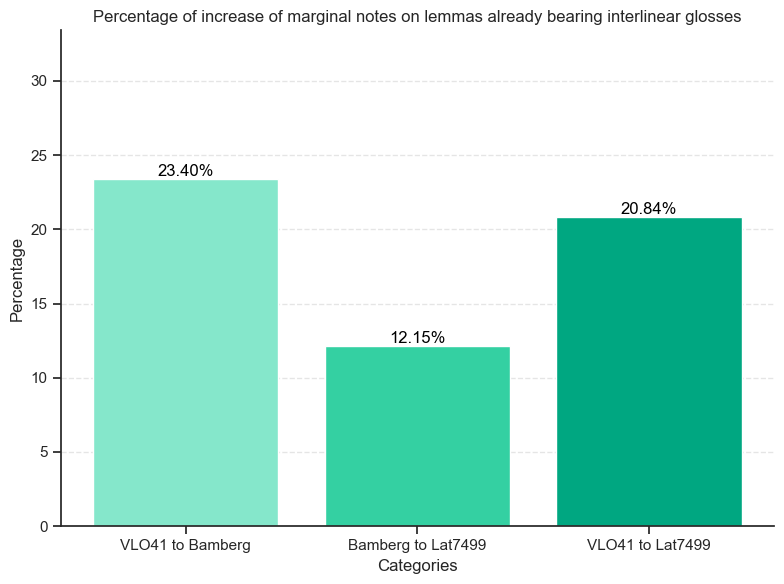

In [425]:
# Define the labels and percentages
labels = ['VLO41 to Bamberg','Bamberg to Lat7499', 'VLO41 to Lat7499']
percentages = [percentage_1, percentage_2, percentage_3]

# Create a figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the bar plot with custom colors
bar_colors = ['#85E7CB', '#34D0A2', '#00A781']
ax.bar(labels, percentages, color=bar_colors)
ax.set_xlabel('Categories')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of increase of marginal notes on lemmas already bearing interlinear glosses')
ax.set_xticklabels(labels)
ax.set_ylim(0, max(percentages) + 10)

# Add value labels to the bars
for i, percentage in enumerate(percentages):
    ax.text(i, percentage, f'{percentage:.2f}%', ha='center', va='bottom', color='black')

# Customize the plot aesthetics
plt.grid(axis='y', linestyle='--', alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Display and save the plot
plt.tight_layout()
plt.savefig('graphs/incremental_gloss_to_marge.png')
plt.show()

## The core gloss tradition passed down to every single mss with the same form and type no matter the divergencies though

In [454]:
# Filter the rows where the conditions are met
identical_full = merged_df_full[
    (merged_df_full['gloss_type_VLO41'] == merged_df_full['gloss_type_Bamberg']) &
    (merged_df_full['gloss_type_Bamberg'] == merged_df_full['gloss_type']) &
    (merged_df_full['gloss_form_VLO41'] == merged_df_full['gloss_form_Bamberg']) &
    (merged_df_full['gloss_form_Bamberg'] == merged_df_full['gloss_form'])
]


# Select the desired columns
identical_full = identical_full[['lemma_id', 'gloss_type_VLO41', 'gloss_type_Bamberg', 'gloss_type',
                         'gloss_form_VLO41', 'gloss_form_Bamberg', 'gloss_form']]

# Merge with merged_df_Bamberg_Lat7499 to get 'lemma_Bamberg' and 'lemma_Lat7499'
identical_full = identical_full.merge(merged_df_full[['lemma_id', 'lemma_VLO41', 'gloss_VLO41', 'lemma_Bamberg', 'gloss_Bamberg', 'lemma', 'gloss']],
                              on='lemma_id', how='left')

# Save the result as a CSV file
identical_full.to_csv('identical_glosses_csv/identical_glosses_allmss_without_glossary.csv', index=False)

# Display the new DataFrame
identical_full

,lemma_id,gloss_type_VLO41,gloss_type_Bamberg,gloss_type,gloss_form_VLO41,gloss_form_Bamberg,gloss_form,lemma_VLO41,gloss_VLO41,lemma_Bamberg,gloss_Bamberg,lemma,gloss
0,p447_l05_o06,S22,S22,S22,F2,F2,F2,auditorum,iđ discipulorũ,AVDITORVM,discipulorũ,AVDITORṼ,discipuloꝵ
1,p447_l07_o01,S22,S22,S22,F2,F2,F2,desiderat,cupit,desider&,c̃cupiscat,desideret,.s. audire
2,p447_l07_o03,S22,S22,S22,F2,F2,F2,recens,nouit(er),recens,nouum,recens,Nouũ
3,p447_l11_o06,S22,S22,S22,F2,F2,F2,romana,lat̃,romana,latina,romana,÷ latina
4,p447_l13_o03,S22,S22,S22,F3,F3,F3,instruitur,ordinatur /(et di)sponitur,instruit᷑,disponit᷑ ORDIN ͣ ͭ ͧ ͬ,instruit᷑,ordinat᷑ et disponit᷑
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,p463_l15_o03,S22,S22,S22,F2,F2,F2,insignis,nobilis,insignis,nobilis,in̶asignis,nobilis
115,p463_l25_o09,S22,S22,S22,F2,F2,F2,metior,mensuro,M&ior,m̃suro,metior,÷ mensuro
116,p466_l06_o03,S22,S22,S22,F2,F2,F2,rimor,ꝑscrutor,Rimor,inuestigo,Rimor,inqͥro
117,p466_l21_o09,S23,S23,S23,F4,F4,F4,paciscor,pactũ facio,Paciscor,pacẽ facio,pacisor,pacẽ fatio


In [455]:
# Filter the rows where the conditions are met
identical_all = merged_df_all[
    (merged_df_all['gloss_type_VLO41'] == merged_df_all['gloss_type_Bamberg']) &
    (merged_df_all['gloss_type_Bamberg'] == merged_df_all['gloss_type']) &
    (merged_df_all['gloss_form_VLO41'] == merged_df_all['gloss_form_Bamberg']) &
    (merged_df_all['gloss_form_Bamberg'] == merged_df_all['gloss_form'])& 
     (merged_df_all['gloss_type'] == merged_df_all['gloss_type_Latin14087']) &
    (merged_df_all['gloss_form'] == merged_df_all['gloss_form_Latin14087'])
]


# Select the desired columns
identical_all = identical_all[['lemma_id', 'gloss_type_VLO41', 'gloss_type_Bamberg', 'gloss_type','gloss_type_Latin14087',
                         'gloss_form_VLO41', 'gloss_form_Bamberg', 'gloss_form','gloss_form_Latin14087']]

identical_all = identical_all.merge(merged_df_all[['lemma_id', 'lemma_VLO41', 'gloss_VLO41', 'lemma_Bamberg', 'gloss_Bamberg', 'lemma', 'gloss','gloss_Latin14087']],
                              on='lemma_id', how='left')

# Save the result as a CSV file
identical_all.to_csv('identical_glosses_csv/identical_glosses_allmss_with_glossary.csv', index=False)

# Display the new DataFrame
identical_all

,lemma_id,gloss_type_VLO41,gloss_type_Bamberg,gloss_type,gloss_type_Latin14087,gloss_form_VLO41,gloss_form_Bamberg,gloss_form,gloss_form_Latin14087,lemma_VLO41,gloss_VLO41,lemma_Bamberg,gloss_Bamberg,lemma,gloss,gloss_Latin14087
0,p451_l12_o03,S22,S22,S22,S22,F2,F2,F2,F2,Ferio,ꝑcucio,ferio,ꝑcutio,Ferio,ꝑcutio,Exsicco ł ferio
1,p451_l23_o05,S22,S22,S22,S22,F2,F2,F2,F2,potior,utor,potior,fruor,potior,possideo,Potior fruor
2,p453_l29_o08,S22,S22,S22,S22,F3,F3,F3,F3,efutilis,uacuus instabilis,effutilis,uanus instab̶is,effutił,uanus/ instabilis,Effutilis inutilis ł in stablis uanꝰ ł loquax;
3,p457_l26_o07,S22,S22,S22,S22,F3,F3,F3,F3,prob;,idoneus strenuus sagax,probus,bonus +,ꝓbus,bonus ęquus/ꝑfectus,ꝓbus. benemoratꝰ. honestus. Festiuus decens . ...
4,p458_l21_o06,S22,S22,S22,S22,F2,F2,F2,F2,ubero,abundo,exubero,abundo,Exubero,habundo,Exuberor abundo
5,p466_l21_o09,S23,S23,S23,S23,F4,F4,F4,F4,paciscor,pactũ facio,Paciscor,pacẽ facio,pacisor,pacẽ fatio,Pasciscor pacẽ redintegror


## Let's see if we can establish a similarity index. 

In [450]:
# Manuscripts
manuscripts = ["VLO41", "Bamberg", "Lat14087", "Lat7499"]

# Dictionary to store the length of identical lemmas between each pair of manuscripts (intersections)
identical_lengths = {
    ('VLO41', 'Bamberg'): 242,
    ('VLO41', 'Lat7499'): 234,
    ('VLO41', 'Lat14087'): 30,
    ('Bamberg', 'Lat7499'): 521,
    ('Bamberg', 'Lat14087'): 48,
    ('Lat14087', 'Lat7499'): 45,
}

# Dictionary to store the length of shared lemmas between each pair of manuscripts (union)
shared_lengths = {
    ('VLO41', 'Bamberg'): 556,
    ('VLO41', 'Lat7499'): 643,
    ('VLO41', 'Lat14087'): 141,
    ('Bamberg', 'Lat7499'): 1095,
    ('Bamberg', 'Lat14087'): 164,
    ('Lat14087', 'Lat7499'): 168,
}

def calculate_jaccard_similarity(manuscripts, identical_lengths, shared_lengths):
    num_manuscripts = len(manuscripts)
    jaccard_matrix = np.zeros((num_manuscripts, num_manuscripts))
    
    for i in range(num_manuscripts):
        for j in range(i+1, num_manuscripts):
            manuscript1 = manuscripts[i]
            manuscript2 = manuscripts[j]
            intersection = identical_lengths.get((manuscript1, manuscript2), 0)
            union = shared_lengths.get((manuscript1, manuscript2), 0)
            jaccard_similarity = intersection / union
            jaccard_matrix[i, j] = jaccard_similarity
    
    # Copy the upper triangle to the lower triangle to make the matrix symmetric
    jaccard_matrix += jaccard_matrix.T
    
    # Create DataFrame for Jaccard matrix
    df_jaccard = pd.DataFrame(jaccard_matrix, columns=manuscripts, index=manuscripts)
    
    return df_jaccard

# Calculate Jaccard similarity
df_jaccard = calculate_jaccard_similarity(manuscripts, identical_lengths, shared_lengths)

# Print the Jaccard similarity DataFrame
df_jaccard

,VLO41,Bamberg,Lat14087,Lat7499
VLO41,0.000000,0.435252,0.212766,0.363919
Bamberg,0.435252,0.000000,0.292683,0.475799
Lat14087,0.212766,0.292683,0.000000,0.267857
Lat7499,0.363919,0.475799,0.267857,0.000000


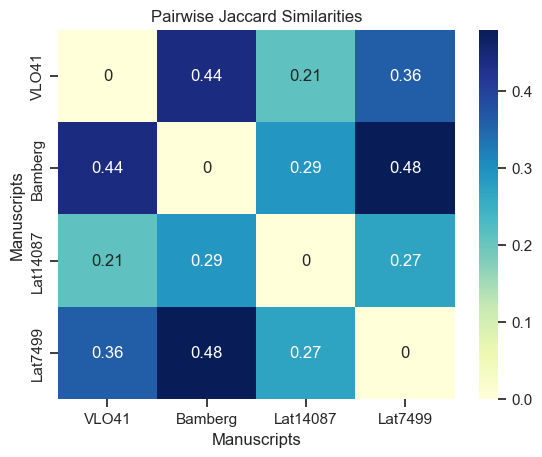

In [457]:
# Distance matrix
similarity_matrix = np.array(df_jaccard)

# Create DataFrame for distance matrix
df_similarity = pd.DataFrame(distance_matrix, columns=manuscripts, index=manuscripts)

df_similarity = df_distance.round(2)  # Specify the desired decimal precision

# Create heatmap
sns.heatmap(df_distance, annot=True, cmap="YlGnBu")

# Add labels and title
plt.xlabel("Manuscripts")
plt.ylabel("Manuscripts")
plt.title("Pairwise Jaccard Similarities")

plt.savefig('graphs/jaccard_similarity.png')


# Show the plot
plt.show()

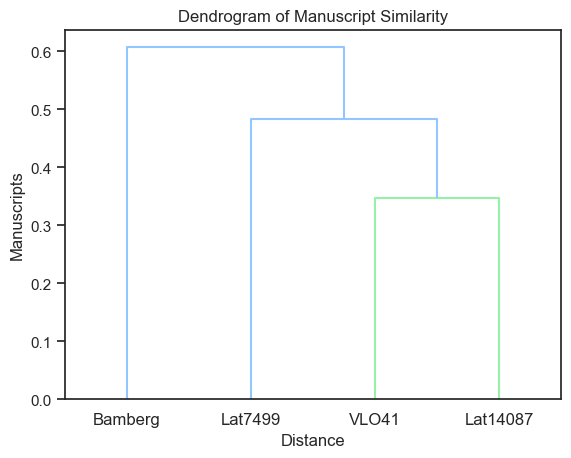

In [467]:
from scipy.cluster import hierarchy

# Calculate Jaccard similarity
df_jaccard = calculate_jaccard_similarity(manuscripts, identical_lengths, shared_lengths)

# Calculate the distance matrix from the similarity matrix
distance_matrix = 1 - df_jaccard

# Perform hierarchical clustering
linkage = hierarchy.linkage(distance_matrix, method='average')

# Create dendrogram
dendrogram = hierarchy.dendrogram(linkage, labels=df_jaccard.index, orientation='top')

# Set plot parameters
plt.xlabel('Distance')
plt.ylabel('Manuscripts')
plt.title('Dendrogram of Manuscript Similarity')

plt.savefig('graphs/dendrogram_jaccard_similarity.png')


# Display the dendrogram
plt.show()
